# Import libraries and python scripts

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import pylab as pl
from sklearn import preprocessing
from sklearn import cross_validation
from sklearn.cross_validation import KFold
from sklearn.cross_validation import train_test_split
from sklearn import neighbors, tree, naive_bayes
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import feature_selection
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import completeness_score, homogeneity_score
from sklearn import decomposition
from sklearn.tree import export_graphviz
from sklearn.linear_model import LinearRegression, Lasso, Ridge
import graphviz
%matplotlib inline

C:\Users\Kari\Anaconda3\envs\Python27\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Kari\Anaconda3\envs\Python27\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


# ----------------------------------------- Import Dataset -----------------------------------------------

In [2]:
nhanes_data = pd.read_csv("C:\\DePaul Coursework\\Fall 2017 CSC 478\\Final Project\\NHANES_CombinedProjectDataset.csv", delimiter=",", index_col=0, header=0)

In [3]:
num_rows = nhanes_data.shape[0] + 1
num_cols = nhanes_data.shape[1] + 1
pd.set_option('max_rows', num_rows)
pd.set_option('max_columns', num_cols)
np.set_printoptions(threshold=np.inf)

In [4]:
nhanes_data.shape

(10175, 44)

In [5]:
print nhanes_data.head()

       RIAGENDR  RIDAGEYR  RIDRETH1  DMDEDUC2  DMDMARTL  INDHHIN2  INDFMPIR  \
SEQN                                                                          
73557         1        69         4       3.0       4.0       4.0      0.84   
73558         1        54         3       3.0       1.0       7.0      1.78   
73559         1        72         3       4.0       1.0      10.0      4.51   
73560         1         9         3       NaN       NaN       9.0      2.52   
73561         2        73         3       5.0       1.0      15.0      5.00   

       BPQ020  CBD070  CBD090  CBD120  CBD130  DIQ010  DBD895  DBD900  DBD905  \
SEQN                                                                            
73557     1.0   300.0     0.0     0.0    85.0     1.0     8.0     8.0     0.0   
73558     1.0   642.0   214.0    40.0    20.0     1.0     0.0     NaN     0.0   
73559     1.0   150.0    25.0    40.0     0.0     1.0     1.0     0.0     0.0   
73560     NaN   400.0     0.0    50.0    

# ---------------------- Remove all Refused and Don't Know Answers ----------------------

# Remove all entries where the person refused to answer or answered don't know

In [6]:
features = np.array(nhanes_data.columns.values.tolist())

refused_ndx = [0, 0, 0, 7, 77, 77, 0, 7, 777777, 777777, 777777, 777777, 7, 7777, 7777, 7777, 7777, 7, 7, 7, 7777, 7, 7777, 7777, 7, 7, 77, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]
refused_arr = np.zeros((1, len(refused_ndx)))
refused_arr[0] = refused_ndx

refused_df = pd.DataFrame(refused_arr)
refused_df.columns = features
print refused_df.shape
print refused_df

(1, 44)
   RIAGENDR  RIDAGEYR  RIDRETH1  DMDEDUC2  DMDMARTL  INDHHIN2  INDFMPIR  \
0       0.0       0.0       0.0       7.0      77.0      77.0       0.0   

   BPQ020    CBD070    CBD090    CBD120    CBD130  DIQ010  DBD895  DBD900  \
0     7.0  777777.0  777777.0  777777.0  777777.0     7.0  7777.0  7777.0   

   DBD905  DBD910  MCQ080  MCQ365A  MCQ365B  PAD680  SMQ020  WHD010  WHD020  \
0  7777.0  7777.0     7.0      7.0      7.0  7777.0     7.0  7777.0  7777.0   

   HEQ010  HEQ030  HUQ051  HUQ071  MCQ010  MCQ082  MCQ086  MCQ160N  MCQ160B  \
0     7.0     7.0    77.0     7.0     7.0     7.0     7.0      7.0      7.0   

   MCQ160C  MCQ160D  MCQ160E  MCQ160F  MCQ160G  MCQ160M  MCQ160K  MCQ160L  \
0      7.0      7.0      7.0      7.0      7.0      7.0      7.0      7.0   

   MCQ160O  MCQ203  MCQ220  
0      7.0     7.0     7.0  


In [7]:
dk_ndx = [0, 0, 0, 9, 99, 99, 0, 9, 999999, 999999, 999999, 999999, 9, 9999, 9999, 9999, 9999, 9, 9, 9, 9999, 9, 9999, 9999, 9, 9, 99, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9]
dk_arr = np.zeros((1, len(dk_ndx)))
dk_arr[0] = dk_ndx

dk_df = pd.DataFrame(dk_arr)
dk_df.columns = features
print dk_df.shape
print dk_df

(1, 44)
   RIAGENDR  RIDAGEYR  RIDRETH1  DMDEDUC2  DMDMARTL  INDHHIN2  INDFMPIR  \
0       0.0       0.0       0.0       9.0      99.0      99.0       0.0   

   BPQ020    CBD070    CBD090    CBD120    CBD130  DIQ010  DBD895  DBD900  \
0     9.0  999999.0  999999.0  999999.0  999999.0     9.0  9999.0  9999.0   

   DBD905  DBD910  MCQ080  MCQ365A  MCQ365B  PAD680  SMQ020  WHD010  WHD020  \
0  9999.0  9999.0     9.0      9.0      9.0  9999.0     9.0  9999.0  9999.0   

   HEQ010  HEQ030  HUQ051  HUQ071  MCQ010  MCQ082  MCQ086  MCQ160N  MCQ160B  \
0     9.0     9.0    99.0     9.0     9.0     9.0     9.0      9.0      9.0   

   MCQ160C  MCQ160D  MCQ160E  MCQ160F  MCQ160G  MCQ160M  MCQ160K  MCQ160L  \
0      9.0      9.0      9.0      9.0      9.0      9.0      9.0      9.0   

   MCQ160O  MCQ203  MCQ220  
0      9.0     9.0     9.0  


In [8]:
for i in range(len(features)):
    ref_ndx = nhanes_data[features[i]] == float(refused_df[features[i]])
    nhanes_data = nhanes_data[~ref_ndx]

    dk_ndx = nhanes_data[features[i]] == float(dk_df[features[i]])
    nhanes_data = nhanes_data[~dk_ndx]

print nhanes_data.shape

(8841, 44)


# --------------------------- Create Initial Exploratory Plots ---------------------------------------

# Create exploratory plots of all variables and save to folder

In [9]:
for i in range(len(features)):
    if str(nhanes_data[features[i]].dtypes) == 'category':
        nhanes_data[features[i]].value_counts().plot(kind='bar')
        plt.xlabel(features[i])
        plt.ylabel('Count')
        plt.title(features[i])
    else:
        temp_ndx = nhanes_data[features[i]].isnull()
        temp_var = nhanes_data[features[i]][~temp_ndx]
        
        plt.hist(temp_var, bins=20, alpha=0.5, edgecolor='black', linewidth=1.2)
        plt.xlabel(features[i])
        plt.ylabel('Count')
        plt.title(features[i])
        plt.grid(True)        
    
    figPath = 'C:\\DePaul Coursework\\Fall 2017 CSC 478\\Final Project\\Exploratory\\Initial Plots\\' + features[i] + '.png'
    plt.savefig(figPath)
    plt.close()

# -------------------- Remove 5555 Entries From DBD895 and DBD900 --------------------

<function matplotlib.pyplot.show>

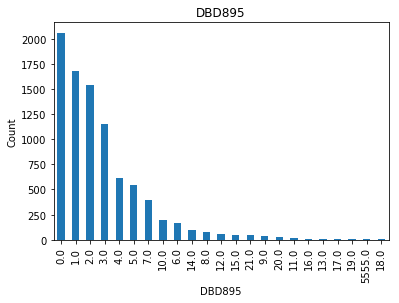

In [10]:
nhanes_data['DBD895'].value_counts().plot(kind='bar')
plt.xlabel('DBD895')
plt.ylabel('Count')
plt.title('DBD895')
plt.show


<function matplotlib.pyplot.show>

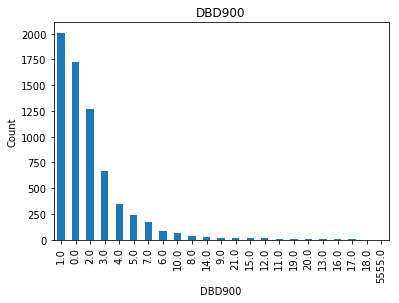

In [11]:
nhanes_data['DBD900'].value_counts().plot(kind='bar')
plt.xlabel('DBD900')
plt.ylabel('Count')
plt.title('DBD900')
plt.show


In [12]:
temp_ndx = nhanes_data['DBD895'] == 5555
print temp_ndx.sum()
nhanes_data = nhanes_data[~temp_ndx]

temp_ndx = nhanes_data['DBD900'] == 5555
print temp_ndx.sum()
nhanes_data = nhanes_data[~temp_ndx]


5
0


# ------------------- Set Column Types to Match Dataset Types ------------------------------

In [13]:
nhanes_data.dtypes

RIAGENDR      int64
RIDAGEYR      int64
RIDRETH1      int64
DMDEDUC2    float64
DMDMARTL    float64
INDHHIN2    float64
INDFMPIR    float64
BPQ020      float64
CBD070      float64
CBD090      float64
CBD120      float64
CBD130      float64
DIQ010      float64
DBD895      float64
DBD900      float64
DBD905      float64
DBD910      float64
MCQ080      float64
MCQ365A     float64
MCQ365B     float64
PAD680      float64
SMQ020      float64
WHD010      float64
WHD020      float64
HEQ010      float64
HEQ030      float64
HUQ051        int64
HUQ071        int64
MCQ010      float64
MCQ082      float64
MCQ086      float64
MCQ160N     float64
MCQ160B     float64
MCQ160C     float64
MCQ160D     float64
MCQ160E     float64
MCQ160F     float64
MCQ160G     float64
MCQ160M     float64
MCQ160K     float64
MCQ160L     float64
MCQ160O     float64
MCQ203      float64
MCQ220      float64
dtype: object

In [14]:
cat_attrs = ['RIAGENDR', 'RIDRETH1', 'DMDEDUC2', 'DMDMARTL', 'INDHHIN2', 'BPQ020', 'DIQ010', 'MCQ080', 'MCQ365A', 'MCQ365B', 'SMQ020', 'HEQ010', 'HEQ030', 'HUQ051', 'HUQ071', 'MCQ010', 'MCQ082', 'MCQ086', 'MCQ160N', 'MCQ160B', 'MCQ160C', 'MCQ160D', 'MCQ160E', 'MCQ160F', 'MCQ160G', 'MCQ160M', 'MCQ160K', 'MCQ160L', 'MCQ160O', 'MCQ203', 'MCQ220']

for i in range(len(cat_attrs)):
    nhanes_data[cat_attrs[i]] = nhanes_data[cat_attrs[i]].astype('category')


# ------------------------------------ Remove NaN Values ---------------------------------------------

# Find all null values and replace with mean if numeric or drop rows if categorical

In [15]:
nhanes_data.isnull().sum().sum()

84813

In [16]:
for i in range(len(features)):
    if str(nhanes_data[features[i]].dtypes) == 'category':
        nhanes_data.drop(nhanes_data[nhanes_data[features[i]].isnull()].index, axis=0, inplace=True)

In [17]:
nhanes_data.shape

(5055, 44)

In [18]:
nhanes_data.isnull().sum().sum()

1358

In [19]:
null_cnt = nhanes_data.isnull().sum()
null_ndx = null_cnt > 0
print null_cnt[null_ndx]

INDFMPIR     157
CBD070         4
CBD090         5
CBD120         4
CBD130         4
DBD900      1123
DBD905        13
DBD910        10
PAD680         5
WHD010        16
WHD020        17
dtype: int64


In [20]:
print 'Percent NaN of DBD900 Attribute:'
print (nhanes_data['DBD900'].isnull().sum() / float(nhanes_data.shape[0])) * 100

Percent NaN of DBD900 Attribute:
22.215628091


In [21]:
nhanes_data.drop(nhanes_data[nhanes_data['DBD900'].isnull()].index, axis=0, inplace=True)

In [22]:
nhanes_data.shape

(3932, 44)

In [23]:
nhanes_data.isnull().sum().sum()

193

In [24]:
for i in range(len(features)):
    if str(nhanes_data[features[i]].dtypes) != 'category':
        nhanes_data[features[i]].fillna(nhanes_data[features[i]].mean(), inplace=True)


In [25]:
nhanes_data.shape

(3932, 44)

In [26]:
nhanes_data.isnull().sum().sum()

0

In [27]:
cat_attrs = ['RIAGENDR', 'RIDRETH1', 'DMDEDUC2', 'DMDMARTL', 'INDHHIN2', 'BPQ020', 'DIQ010', 'MCQ080', 'MCQ365A', 'MCQ365B', 'SMQ020', 'HEQ010', 'HEQ030', 'HUQ051', 'HUQ071', 'MCQ010', 'MCQ082', 'MCQ086', 'MCQ160N', 'MCQ160B', 'MCQ160C', 'MCQ160D', 'MCQ160E', 'MCQ160F', 'MCQ160G', 'MCQ160M', 'MCQ160K', 'MCQ160L', 'MCQ160O', 'MCQ203', 'MCQ220']

for i in range(len(cat_attrs)):
    if str(nhanes_data[features[i]].dtypes) == 'category':
        nhanes_data[cat_attrs[i]] = nhanes_data[cat_attrs[i]].astype('int')
        nhanes_data[cat_attrs[i]] = nhanes_data[cat_attrs[i]].astype('category')

In [28]:
print nhanes_data.head()

      RIAGENDR  RIDAGEYR RIDRETH1 DMDEDUC2 DMDMARTL INDHHIN2  INDFMPIR BPQ020  \
SEQN                                                                            
73557        1        69        4        3        4        4      0.84      1   
73559        1        72        3        4        1       10      4.51      1   
73562        1        56        1        4        3        9      4.79      1   
73564        2        61        3        5        2       10      5.00      1   
73565        1        42        2        3        1       15      5.00      2   

       CBD070  CBD090  CBD120  CBD130 DIQ010  DBD895  DBD900  DBD905  DBD910  \
SEQN                                                                           
73557   300.0     0.0     0.0    85.0    1.0     8.0     8.0     0.0     4.0   
73559   150.0    25.0    40.0     0.0    1.0     1.0     0.0     0.0     0.0   
73562   150.0    60.0    60.0     0.0    2.0    14.0    14.0     0.0     0.0   
73564   400.0   100.0   200.0   

# -------------- Remove Income Ranges That Overlap Other Ranges ---------------------

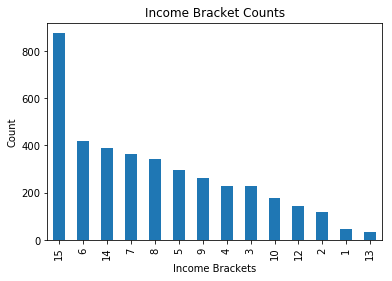

In [29]:
nhanes_data["INDHHIN2"].value_counts().plot(kind='bar')
plt.xlabel('Income Brackets')
plt.ylabel('Count')
plt.title('Income Bracket Counts')

In [30]:
ndx_12 = nhanes_data['INDHHIN2'] == 12
nhanes_data = nhanes_data[~ndx_12]

ndx_13 = nhanes_data['INDHHIN2'] == 13
nhanes_data = nhanes_data[~ndx_13]

nhanes_data.shape

(3754, 44)

# --------------- Set Categorical Variables To Their String Values --------------------------

In [31]:
for i in range(len(features)):
     if str(nhanes_data[features[i]].dtypes) == 'category':
            
        nhanes_data[features[i]] = nhanes_data[features[i]].astype('int')
        nhanes_data[features[i]] = nhanes_data[features[i]].astype('str')
        
        if features[i] == 'RIAGENDR':            
            nhanes_data[features[i]] = nhanes_data[features[i]].replace('1' ,'Male')
            nhanes_data[features[i]] = nhanes_data[features[i]].replace('2' ,'Female')
            
        elif features[i] == 'RIDRETH1':
            nhanes_data[features[i]] = nhanes_data[features[i]].replace('1' ,'Mexican_American')
            nhanes_data[features[i]] = nhanes_data[features[i]].replace('2' ,'Other_Hispanic')
            nhanes_data[features[i]] = nhanes_data[features[i]].replace('3' ,'Non_Hispanic_White')
            nhanes_data[features[i]] = nhanes_data[features[i]].replace('4' ,'Non_Hispanic_Black')
            nhanes_data[features[i]] = nhanes_data[features[i]].replace('5' ,'Other')

        elif features[i] == 'DMDEDUC2':
            nhanes_data[features[i]] = nhanes_data[features[i]].replace('1' ,'Less_Than_9th')
            nhanes_data[features[i]] = nhanes_data[features[i]].replace('2' ,'9th_to_12th_No_Grad')
            nhanes_data[features[i]] = nhanes_data[features[i]].replace('3' ,'High_School_Grad_GED')
            nhanes_data[features[i]] = nhanes_data[features[i]].replace('4' ,'Some_College_AA')
            nhanes_data[features[i]] = nhanes_data[features[i]].replace('5' ,'College_Grad_And_Above')

        elif features[i] == 'DMDMARTL':
            nhanes_data[features[i]] = nhanes_data[features[i]].replace('1' ,'Married')
            nhanes_data[features[i]] = nhanes_data[features[i]].replace('2' ,'Widowed')
            nhanes_data[features[i]] = nhanes_data[features[i]].replace('3' ,'Divorced')
            nhanes_data[features[i]] = nhanes_data[features[i]].replace('4' ,'Separated')
            nhanes_data[features[i]] = nhanes_data[features[i]].replace('5' ,'Never_Married')
            nhanes_data[features[i]] = nhanes_data[features[i]].replace('6' ,'Living_W_Partner')

        elif features[i] == 'INDHHIN2':
            nhanes_data[features[i]] = nhanes_data[features[i]].replace('1' ,'0_to_4999')
            nhanes_data[features[i]] = nhanes_data[features[i]].replace('2' ,'5000_to_9999')
            nhanes_data[features[i]] = nhanes_data[features[i]].replace('3' ,'10000_to_14999')
            nhanes_data[features[i]] = nhanes_data[features[i]].replace('4' ,'15000_to_19999')
            nhanes_data[features[i]] = nhanes_data[features[i]].replace('5' ,'20000_to_24999')
            nhanes_data[features[i]] = nhanes_data[features[i]].replace('6' ,'25000_to_34999')
            nhanes_data[features[i]] = nhanes_data[features[i]].replace('7' ,'35000_to_44999')
            nhanes_data[features[i]] = nhanes_data[features[i]].replace('8' ,'45000_to_54999')
            nhanes_data[features[i]] = nhanes_data[features[i]].replace('9' ,'55000_to_64999')
            nhanes_data[features[i]] = nhanes_data[features[i]].replace('10' ,'65000_to_74999')
            nhanes_data[features[i]] = nhanes_data[features[i]].replace('14' ,'75000_to_99999')
            nhanes_data[features[i]] = nhanes_data[features[i]].replace('15' ,'100000_And_Over')

        elif features[i] == 'DIQ010':
            nhanes_data[features[i]] = nhanes_data[features[i]].replace('1' ,'Yes')
            nhanes_data[features[i]] = nhanes_data[features[i]].replace('2' ,'No')
            nhanes_data[features[i]] = nhanes_data[features[i]].replace('3' ,'Borderline')

        elif features[i] == 'HUQ051':
            nhanes_data[features[i]] = nhanes_data[features[i]].replace('1' ,'1')
            nhanes_data[features[i]] = nhanes_data[features[i]].replace('2' ,'2_to_3')
            nhanes_data[features[i]] = nhanes_data[features[i]].replace('3' ,'4_to_5')
            nhanes_data[features[i]] = nhanes_data[features[i]].replace('4' ,'6_to_7')
            nhanes_data[features[i]] = nhanes_data[features[i]].replace('5' ,'8_to_9')
            nhanes_data[features[i]] = nhanes_data[features[i]].replace('6' ,'10_to_12')
            nhanes_data[features[i]] = nhanes_data[features[i]].replace('7' ,'13_to_15')
            nhanes_data[features[i]] = nhanes_data[features[i]].replace('8' ,'16_Or_More')

        else:
            nhanes_data[features[i]] = nhanes_data[features[i]].replace('1' ,'Yes')
            nhanes_data[features[i]] = nhanes_data[features[i]].replace('2' ,'No')
            
        nhanes_data[features[i]] = nhanes_data[features[i]].astype('category')
            

# --------------- Create Classification and Regression Variables ---------------------------

# Create BMI Percentage and Obesity Indicator variables (Obesity Indicator will become the class variable)

In [32]:
lb_to_kg_const =  0.45359237
ft_to_m_const = 0.3048

nhanes_data['Weight_kg'] = nhanes_data['WHD020'] * lb_to_kg_const
nhanes_data['Height_m'] = nhanes_data['WHD010'] * ft_to_m_const

nhanes_data['BMI_Perc'] = (nhanes_data['Weight_kg'] / (nhanes_data['Height_m']**2)) * 100


In [33]:
obese_arr = np.zeros(nhanes_data.shape[0])
obese_ndx = nhanes_data['BMI_Perc'] >= 30
obese_arr[obese_ndx] = 1

nhanes_data['Obese_Ind'] = obese_arr
nhanes_data['Obese_Ind'] = nhanes_data['Obese_Ind'].astype('int')
nhanes_data['Obese_Ind'] = nhanes_data['Obese_Ind'].astype('category')

# ----------------------------- Print Descriptive Statistics ------------------------------------------

In [34]:
num_rows = nhanes_data.shape[0] + 1
num_cols = nhanes_data.shape[1] + 1
pd.set_option('max_rows', num_rows)
pd.set_option('max_columns', num_cols)
np.set_printoptions(threshold=np.inf)

In [35]:
nhanes_data.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
RIAGENDR,3754,2,Female,1931,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RIDAGEYR,3754,NaN,NaN,NaN,47.3013,17.308,20,33,45,61,80
RIDRETH1,3754,5,Non_Hispanic_White,1730,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DMDEDUC2,3754,5,Some_College_AA,1251,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DMDMARTL,3754,6,Married,1999,NaN,NaN,NaN,NaN,NaN,NaN,NaN
INDHHIN2,3754,12,100000_And_Over,876,NaN,NaN,NaN,NaN,NaN,NaN,NaN
INDFMPIR,3754,NaN,NaN,NaN,2.7216,1.65501,0.01,1.2,2.46,4.55,5
BPQ020,3754,2,No,2449,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CBD070,3754,NaN,NaN,NaN,432.925,314.826,0,200,400,557,4285
CBD090,3754,NaN,NaN,NaN,38.954,71.3283,0,0,0,50,1542


# -------------------------------- Exploratory Plot Creation -----------------------------------------

# Create exploratory plots of variables of interest

In [36]:
for i in range(len(features)):
    if str(nhanes_data[features[i]].dtypes) == 'category':
        nhanes_data[features[i]].value_counts().plot(kind='bar')
        plt.xlabel(features[i])
        plt.ylabel('Count')
        plt.title(features[i])
    else:
        temp_ndx = nhanes_data[features[i]].isnull()
        temp_var = nhanes_data[features[i]][~temp_ndx]
        
        plt.hist(temp_var, bins=20, alpha=0.5, edgecolor='black', linewidth=1.2)
        plt.xlabel(features[i])
        plt.ylabel('Count')
        plt.title(features[i])
        plt.grid(True)        
    
    figPath = 'C:\\DePaul Coursework\\Fall 2017 CSC 478\\Final Project\\Exploratory\\Processed Plots\\' + features[i] + '.png'
    plt.savefig(figPath)
    plt.close()

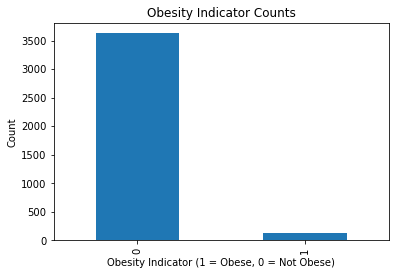

In [37]:
nhanes_data["Obese_Ind"].value_counts().plot(kind='bar')
plt.xlabel('Obesity Indicator (1 = Obese, 0 = Not Obese)')
plt.ylabel('Count')
plt.title('Obesity Indicator Counts')

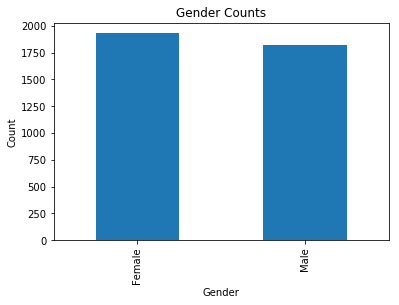

In [38]:
nhanes_data["RIAGENDR"].value_counts().plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Counts')

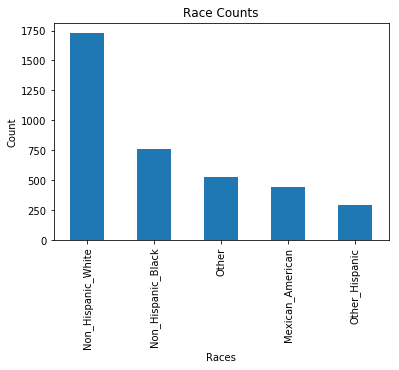

In [39]:
nhanes_data["RIDRETH1"].value_counts().plot(kind='bar')
plt.xlabel('Races')
plt.ylabel('Count')
plt.title('Race Counts')

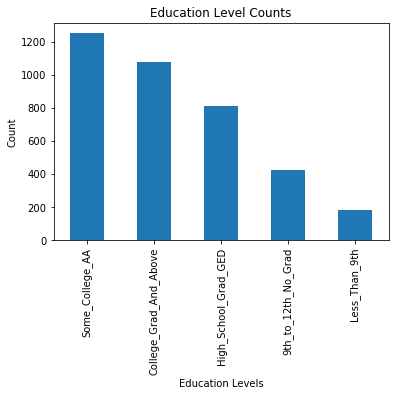

In [40]:
nhanes_data["DMDEDUC2"].value_counts().plot(kind='bar')
plt.xlabel('Education Levels')
plt.ylabel('Count')
plt.title('Education Level Counts')

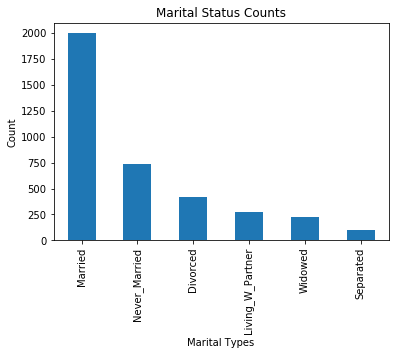

In [41]:
nhanes_data["DMDMARTL"].value_counts().plot(kind='bar')
plt.xlabel('Marital Types')
plt.ylabel('Count')
plt.title('Marital Status Counts')

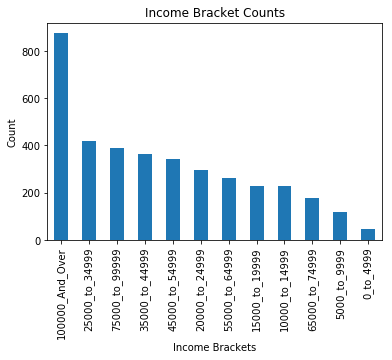

In [42]:
nhanes_data["INDHHIN2"].value_counts().plot(kind='bar')
plt.xlabel('Income Brackets')
plt.ylabel('Count')
plt.title('Income Bracket Counts')

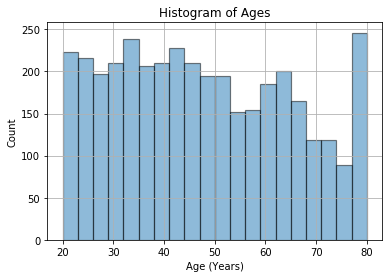

In [43]:
plt.hist(nhanes_data["RIDAGEYR"], bins=20, alpha=0.5, edgecolor='black', linewidth=1.2)
plt.xlabel('Age (Years)')
plt.ylabel('Count')
plt.title('Histogram of Ages')
plt.grid(True)

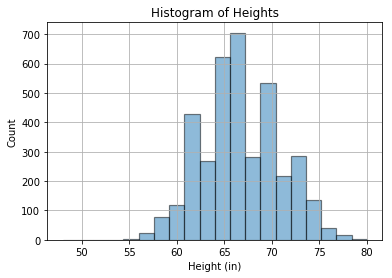

In [44]:
plt.hist(nhanes_data["WHD010"], bins=20, alpha=0.5, edgecolor='black', linewidth=1.2)
plt.xlabel('Height (in)')
plt.ylabel('Count')
plt.title('Histogram of Heights')
plt.grid(True)

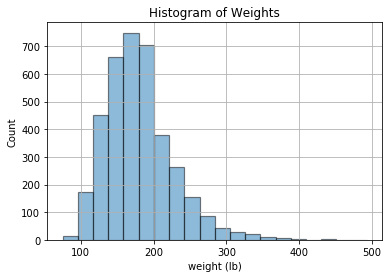

In [45]:
plt.hist(nhanes_data["WHD020"], bins=20, alpha=0.5, edgecolor='black', linewidth=1.2)
plt.xlabel('weight (lb)')
plt.ylabel('Count')
plt.title('Histogram of Weights')
plt.grid(True)

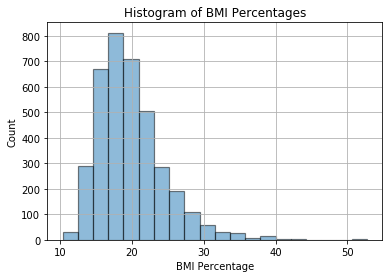

In [46]:
plt.hist(nhanes_data["BMI_Perc"], bins=20, alpha=0.5, edgecolor='black', linewidth=1.2)
plt.xlabel('BMI Percentage')
plt.ylabel('Count')
plt.title('Histogram of BMI Percentages')
plt.grid(True)

# Create exploratory crosstabulation plots of variables of interest

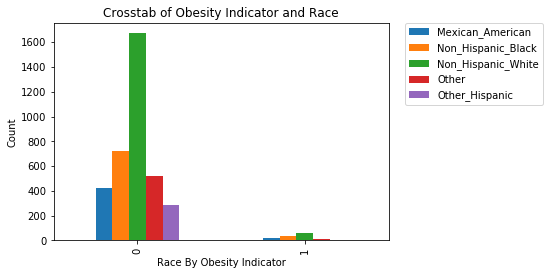

In [47]:
obs_race_cross = pd.crosstab(nhanes_data["Obese_Ind"], nhanes_data["RIDRETH1"])
obs_race_cross.plot(kind="bar")
plt.xlabel('Race By Obesity Indicator')
plt.ylabel('Count')
plt.title('Crosstab of Obesity Indicator and Race')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

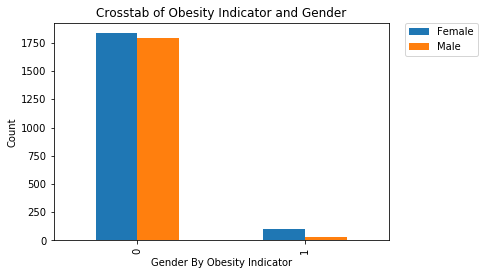

In [48]:
obs_race_cross = pd.crosstab(nhanes_data["Obese_Ind"], nhanes_data["RIAGENDR"])
obs_race_cross.plot(kind="bar")
plt.xlabel('Gender By Obesity Indicator')
plt.ylabel('Count')
plt.title('Crosstab of Obesity Indicator and Gender')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

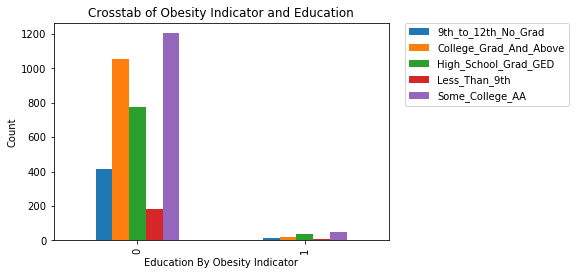

In [49]:
obs_ed_cross = pd.crosstab(nhanes_data["Obese_Ind"], nhanes_data["DMDEDUC2"])
obs_ed_cross.plot(kind="bar")
plt.xlabel('Education By Obesity Indicator')
plt.ylabel('Count')
plt.title('Crosstab of Obesity Indicator and Education')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

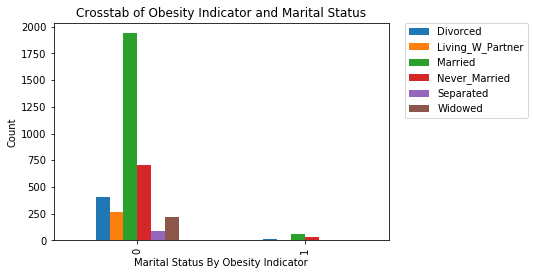

In [50]:
obs_mar_cross = pd.crosstab(nhanes_data["Obese_Ind"], nhanes_data["DMDMARTL"])
obs_mar_cross.plot(kind="bar")
plt.xlabel('Marital Status By Obesity Indicator')
plt.ylabel('Count')
plt.title('Crosstab of Obesity Indicator and Marital Status')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

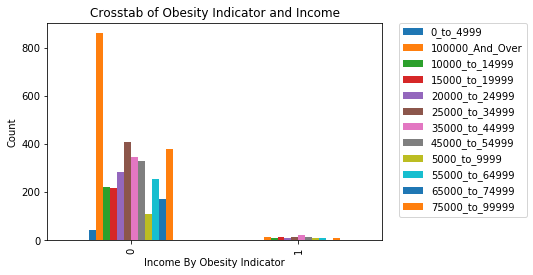

In [51]:
obs_inc_cross = pd.crosstab(nhanes_data["Obese_Ind"], nhanes_data["INDHHIN2"])
obs_inc_cross.plot(kind="bar")
plt.xlabel('Income By Obesity Indicator')
plt.ylabel('Count')
plt.title('Crosstab of Obesity Indicator and Income')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Create exploratory scatter plots of variables of interest

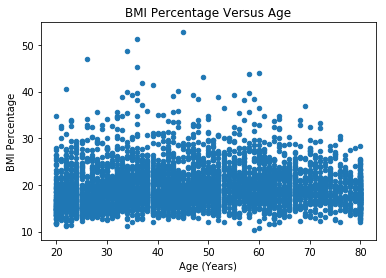

In [52]:
nhanes_data.plot(x="RIDAGEYR", y="BMI_Perc", kind="scatter")
plt.xlabel('Age (Years)')
plt.ylabel('BMI Percentage')
plt.title('BMI Percentage Versus Age')

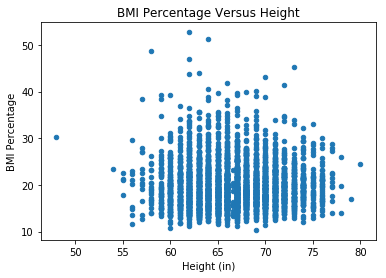

In [53]:
nhanes_data.plot(x="WHD010", y="BMI_Perc", kind="scatter")
plt.xlabel('Height (in)')
plt.ylabel('BMI Percentage')
plt.title('BMI Percentage Versus Height')

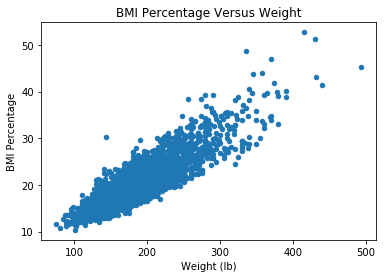

In [54]:
nhanes_data.plot(x="WHD020", y="BMI_Perc", kind="scatter")
plt.xlabel('Weight (lb)')
plt.ylabel('BMI Percentage')
plt.title('BMI Percentage Versus Weight')

# -------------------------- Create All Variable Correlation ----------------------------------------

# Create dummy variables of all categorical variables for correlation

In [55]:
nhanes_spdsht_all = pd.get_dummies(nhanes_data)

In [56]:
num_rows = nhanes_spdsht_all.shape[0] + 1
num_cols = nhanes_spdsht_all.shape[1] + 1
pd.set_option('max_rows', num_rows)
pd.set_option('max_columns', num_cols)
np.set_printoptions(threshold=np.inf)

# Create correlation matrix of entire dataframe

In [57]:
nhanes_corr = nhanes_spdsht_all.corr(method="pearson")
nhanes_corr.to_csv('C:\\DePaul Coursework\\Fall 2017 CSC 478\\Final Project\\Outputs\\NHANES Correlation Output.csv', sep=",")
nhanes_corr

,RIDAGEYR,INDFMPIR,CBD070,CBD090,CBD120,CBD130,DBD895,DBD900,DBD905,DBD910,PAD680,WHD010,WHD020,Weight_kg,Height_m,BMI_Perc,RIAGENDR_Female,RIAGENDR_Male,RIDRETH1_Mexican_American,RIDRETH1_Non_Hispanic_Black,RIDRETH1_Non_Hispanic_White,RIDRETH1_Other,RIDRETH1_Other_Hispanic,DMDEDUC2_9th_to_12th_No_Grad,DMDEDUC2_College_Grad_And_Above,DMDEDUC2_High_School_Grad_GED,DMDEDUC2_Less_Than_9th,DMDEDUC2_Some_College_AA,DMDMARTL_Divorced,DMDMARTL_Living_W_Partner,DMDMARTL_Married,DMDMARTL_Never_Married,DMDMARTL_Separated,DMDMARTL_Widowed,INDHHIN2_0_to_4999,INDHHIN2_100000_And_Over,INDHHIN2_10000_to_14999,INDHHIN2_15000_to_19999,INDHHIN2_20000_to_24999,INDHHIN2_25000_to_34999,INDHHIN2_35000_to_44999,INDHHIN2_45000_to_54999,INDHHIN2_5000_to_9999,INDHHIN2_55000_to_64999,INDHHIN2_65000_to_74999,INDHHIN2_75000_to_99999,BPQ020_No,BPQ020_Yes,DIQ010_Borderline,DIQ010_No,DIQ010_Yes,MCQ080_No,MCQ080_Yes,MCQ365A_No,MCQ365A_Yes,MCQ365B_No,MCQ365B_Yes,SMQ020_No,SMQ020_Yes,HEQ010_No,HEQ010_Yes,HEQ030_No,HEQ030_Yes,HUQ051_0,HUQ051_1,HUQ051_10_to_12,HUQ051_13_to_15,HUQ051_16_Or_More,HUQ051_2_to_3,HUQ051_4_to_5,HUQ051_6_to_7,HUQ051_8_to_9,HUQ071_No,HUQ071_Yes,MCQ010_No,MCQ010_Yes,MCQ082_No,MCQ082_Yes,MCQ086_No,MCQ086_Yes,MCQ160N_No,MCQ160N_Yes,MCQ160B_No,MCQ160B_Yes,MCQ160C_No,MCQ160C_Yes,MCQ160D_No,MCQ160D_Yes,MCQ160E_No,MCQ160E_Yes,MCQ160F_No,MCQ160F_Yes,MCQ160G_No,MCQ160G_Yes,MCQ160M_No,MCQ160M_Yes,MCQ160K_No,MCQ160K_Yes,MCQ160L_No,MCQ160L_Yes,MCQ160O_No,MCQ160O_Yes,MCQ203_No,MCQ203_Yes,MCQ220_No,MCQ220_Yes,Obese_Ind_0,Obese_Ind_1
RIDAGEYR,1.000000,0.099393,-0.089679,-0.007419,-0.042008,-0.078684,-0.177204,-0.227756,-0.042923,-0.075917,0.033973,-0.048542,0.001725,0.001725,-0.048542,0.029551,-0.020874,0.020874,-0.066194,-0.027693,0.143494,-0.084658,-0.035824,0.009640,0.008845,0.021527,0.097458,-0.078663,0.113703,-0.190165,0.182042,-0.404484,0.008979,0.347756,-0.046152,-0.038537,0.053254,0.046707,0.001037,-0.046612,0.018875,0.029097,0.004539,0.002277,-0.007649,-0.006281,-0.432572,0.432572,0.093108,-0.276485,0.255886,-0.097347,0.097347,-0.115472,0.115472,-0.166346,0.166346,-0.118390,0.118390,-0.030872,0.030872,-0.067006,0.067006,-0.198799,-0.120781,0.082637,0.007207,0.045884,0.010595,0.125183,0.113504,0.055231,-0.096927,0.096927,0.038832,-0.038832,-0.014612,0.014612,0.018311,-0.018311,-0.160419,0.160419,-0.167532,0.167532,-0.224615,0.224615,-0.148219,0.148219,-0.202498,0.202498,-0.184914,0.184914,-0.120417,0.120417,-0.170884,0.170884,-0.090865,0.090865,-0.071137,0.071137,-0.167320,0.167320,-0.046410,0.046410,-0.315372,0.315372,0.033993,-0.033993
INDFMPIR,0.099393,1.000000,0.153555,0.145180,0.363103,0.056779,0.110298,-0.080414,0.047889,-0.025653,0.158692,0.122049,-0.035297,-0.035297,0.122049,-0.108154,-0.054245,0.054245,-0.155170,-0.124824,0.121916,0.151172,-0.048641,-0.232457,0.449516,-0.166539,-0.194793,-0.039277,-0.078043,-0.109432,0.275869,-0.134454,-0.084050,-0.075114,-0.174874,0.675450,-0.299000,-0.268907,-0.283887,-0.270033,-0.119561,-0.037334,-0.241133,0.080248,0.091134,0.261381,0.023384,-0.023384,-0.015751,0.039185,-0.034860,0.011238,-0.011238,-0.008706,0.008706,-0.017910,0.017910,0.132252,-0.132252,0.015762,-0.015762,0.051322,-0.051322,-0.115231,0.028031,-0.030875,-0.042917,-0.036956,0.085068,0.023877,0.007251,0.015782,0.118641,-0.118641,0.045027,-0.045027,-0.009487,0.009487,-0.038098,0.038098,-0.009940,0.009940,0.070847,-0.070847,0.013270,-0.013270,0.032846,-0.032846,0.041041,-0.041041,0.062056,-0.062056,0.047176,-0.047176,0.012780,-0.012780,0.075505,-0.075505,0.031385,-0.031385,0.048321,-0.048321,0.009358,-0.009358,-0.063117,0.063117,0.069961,-0.069961
CBD070,-0.089679,0.153555,1.000000,0.374941,0.249199,0.095908,-0.034514,-0.052953,0.013243,-0.026869,-0.040123,0.014750,-0.023013,-0.023013,0.014750,-0.034706,-0.029668,0.029668,0.069636,-0.151398,0.028924,0.055185,0.017803,0.012549,0.088721,-0.061621,0.020442,-0.049134,-0.132586,-0.013320,0.213177,-0.090167,-0.036538,-0.082101,-0.054410,0.252671,-0.106712,-0.075998,-0.051824,-0.049207,-0.05203

# -------- Create variables for Classification and Clustering -------------------

# Remove create train and target dataframes

In [58]:
target_df = nhanes_data['Obese_Ind']
target_df.head()

SEQN
73557    0
73559    0
73562    0
73564    0
73565    0
Name: Obese_Ind, dtype: category
Categories (2, int64): [0, 1]

In [59]:
train_df = nhanes_data[:]
train_df = train_df.drop('Obese_Ind', 1) 


In [60]:
train_df = train_df.drop('BMI_Perc', 1) 
train_df = train_df.drop('Height_m', 1) 
train_df = train_df.drop('Weight_kg', 1) 
#train_df = train_df.drop('WHD010', 1) 
#train_df = train_df.drop('WHD020', 1) 
train_df.head()

,RIAGENDR,RIDAGEYR,RIDRETH1,DMDEDUC2,DMDMARTL,INDHHIN2,INDFMPIR,BPQ020,CBD070,CBD090,CBD120,CBD130,DIQ010,DBD895,DBD900,DBD905,DBD910,MCQ080,MCQ365A,MCQ365B,PAD680,SMQ020,WHD010,WHD020,HEQ010,HEQ030,HUQ051,HUQ071,MCQ010,MCQ082,MCQ086,MCQ160N,MCQ160B,MCQ160C,MCQ160D,MCQ160E,MCQ160F,MCQ160G,MCQ160M,MCQ160K,MCQ160L,MCQ160O,MCQ203,MCQ220
SEQN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
73557,Male,69,Non_Hispanic_Black,High_School_Grad_GED,Separated,15000_to_19999,0.84,Yes,300.0,0.0,0.0,85.0,Yes,8.0,8.0,0.0,4.0,Yes,Yes,No,600.0,Yes,69.0,180.0,No,No,8_to_9,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No
73559,Male,72,Non_Hispanic_White,Some_College_AA,Married,65000_to_74999,4.51,Yes,150.0,25.0,40.0,0.0,Yes,1.0,0.0,0.0,0.0,No,No,No,300.0,Yes,70.0,195.0,No,No,2_to_3,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes
73562,Male,56,Mexican_American,Some_College_AA,Divorced,55000_to_64999,4.79,Yes,150.0,60.0,60.0,0.0,No,14.0,14.0,0.0,0.0,Yes,Yes,Yes,360.0,Yes,64.0,235.0,No,No,4_to_5,Yes,No,No,No,Yes,No,Yes,No,Yes,No,No,Yes,No,No,No,No,No
73564,Female,61,Non_Hispanic_White,College_Grad_And_Above,Widowed,65000_to_74999,5.00,Yes,400.0,100.0,200.0,0.0,No,5.0,1.0,0.0,0.0,Yes,Yes,Yes,60.0,No,64.0,212.0,No,No,2_to_3,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
73565,Male,42,Other_Hispanic,High_School_Grad_GED,Married,100000_And_Over,5.00,No,900.0,0.0,300.0,40.0,No,15.0,2.0,7.0,0.0,No,No,No,300.0,Yes,70.0,200.0,No,No,0,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No


# Create dummy variables of all categorical variables for classification 

In [61]:
train_df_spdsht = pd.get_dummies(train_df)

# Split data into testing and training for classification and clustering 

In [62]:
data_train, data_test, target_train, target_test = train_test_split(train_df_spdsht, target_df, test_size = 0.2, random_state = 45)

# Apply max/min normalization to data

In [63]:
min_max_scaler = preprocessing.MinMaxScaler().fit(data_train)
data_train_norm_np = min_max_scaler.transform(data_train)
data_test_norm_np = min_max_scaler.transform(data_test)

# Convert target variables into numpy arrays for sklearn functions

In [64]:
data_train_np = np.array(data_train)
data_test_np = np.array(data_test)
target_train_np = np.array(target_train)
target_test_np = np.array(target_test)

print data_train_np.shape
print target_train_np.shape
print data_test_np.shape
print target_test_np.shape


(3003L, 103L)
(3003L,)
(751L, 103L)
(751L,)


# ---------------------------------------- Classification --------------------------------------------------

# Create Functions Needed For Classification

In [65]:
def find_percent(train_arr, target_arr, model, percent_list, cv_num):

    print '---------------------------------- Feature Selection ----------------------------------'
        
    results = []
    feature_select = []
    feature_scores = []
    features_pvals = []
    for i in percent_list:
        fs = feature_selection.SelectPercentile(feature_selection.chi2, percentile = i)
        train_arr_fs = fs.fit_transform(train_arr, target_arr)
        
        scores = cross_validation.cross_val_score(model, train_arr_fs, target_arr, cv = cv_num, scoring = "accuracy")
        results = np.append(results, scores.mean())        
        feature_select.append(fs.get_support())
        feature_scores.append(fs.scores_)
        features_pvals.append(fs.pvalues_)
   
    optimal_ndx = np.where(results == results.max())[0]    
    if len(optimal_ndx) > 1:
        optimal_ndx = optimal_ndx[-1]
        
    optimal_percentile = int(percent_list[optimal_ndx])
    optimal_num_features = int(optimal_percentile * (train_arr.shape[1])/100) 
    
    chosen_features = feature_select[int(optimal_ndx)]
    chosen_weights = feature_scores[int(optimal_ndx)]
    chosen_pvals = features_pvals[int(optimal_ndx)]
    
    plt.figure()
    plt.xlabel("Percentage of features selected")
    plt.ylabel("Cross validation Accuracy")
    plt.title('Feature Selection Cross Val Accuracy Versus Percentage of Features')   
    plt.plot(percent_list, results)
    plt.plot(optimal_percentile, results[optimal_ndx], 'x', c='k')
    plt.show()   

    return optimal_percentile, optimal_num_features, chosen_features, chosen_weights, chosen_pvals


In [66]:
def optimize_features(train_arr, target_arr, model, all_attrs, chosen_features, chosen_weights, chosen_pvals, cv_num):

    print 'Feature Optimization (Removal of All Attributes with P Values >= 0.05)'
    print '----------------------------------------------------------------------'
    
    train_all_df = pd.DataFrame(train_arr, columns = all_attrs)
                      
    all_w_arr = np.zeros((1, len(chosen_weights)))
    all_w_arr[0] = chosen_weights
    all_w_df = pd.DataFrame(all_w_arr, columns = all_attrs)

    all_p_arr = np.zeros((1, len(chosen_pvals)))
    all_p_arr[0] = chosen_pvals
    all_p_df = pd.DataFrame(all_p_arr, columns = all_attrs)

    fs_features = all_attrs[chosen_features]
    train_fs_df = train_all_df[fs_features]
                      
    fs_weights = chosen_weights[chosen_features]
    fs_p_vals = chosen_pvals[chosen_features]
                      
    fs_w_arr = np.zeros((1, len(fs_weights)))
    fs_w_arr[0] = fs_weights
    fs_w_df = pd.DataFrame(fs_w_arr, columns = fs_features)

    fs_p_arr = np.zeros((1, len(fs_p_vals)))
    fs_p_arr[0] = fs_p_vals
    fs_p_df = pd.DataFrame(fs_p_arr, columns = fs_features)

    result = 0
    feature_select = []
    feature_scores = []
    features_pvals = []

    fs = feature_selection.SelectPercentile(feature_selection.chi2, percentile = 100)

    while True:
        
        p_vals = np.array(fs_p_df)
        max_ndx = np.where(p_vals == p_vals.max())
        max_ndx = np.where(p_vals == p_vals.max())[1]
        if len(max_ndx) > 1:
            max_ndx = max_ndx[0]
        max_p = p_vals[0, int(max_ndx)]
        
        if max_p < 0.05:
            new_fs_features = train_fs_df.columns.values.tolist()
            break
                      
        # Remove attribute with max p value over 0.05
        col_names = train_fs_df.columns.values.tolist()
        max_attr = col_names[int(max_ndx)]
                      
        train_fs_df = train_fs_df.drop(max_attr, 1)
        
        train_fs_np = np.array(train_fs_df)
        new_fs_features = train_fs_df.columns.values.tolist()

        train_arr_fs = fs.fit_transform(train_fs_np, target_arr)
        
        scores = cross_validation.cross_val_score(model, train_arr_fs, target_arr, cv = cv_num, scoring = "accuracy")
        result = scores.mean()        
        feature_select = fs.get_support()
        feature_scores = fs.scores_
        features_pvals = fs.pvalues_
                              
        fs_w_arr = np.zeros((1, len(feature_scores)))
        fs_w_arr[0] = feature_scores
        fs_w_df = pd.DataFrame(fs_w_arr, columns = new_fs_features)

        fs_p_arr = np.zeros((1, len(features_pvals)))
        fs_p_arr[0] = features_pvals
        fs_p_df = pd.DataFrame(fs_p_arr, columns = new_fs_features)
                     

    all_info_df = pd.DataFrame(all_attrs)
    all_info_df["weights"] = chosen_weights
    all_info_df["p_values"] = chosen_pvals
                                          
    fs_info_df = pd.DataFrame(new_fs_features)
    fs_info_df["weights"] = np.array(fs_w_df)[0]
    fs_info_df["p_values"] = np.array(fs_p_df)[0]
                                                              

    print 'Final Number of Training Set Attributes:', train_fs_df.shape[1]
    print 'Final Training Set Features Selection Accuracy:', result
    print 'Final Training Set Attributes:'
    print new_fs_features
    print '\n'
                      
    return train_fs_df, all_info_df, fs_info_df


In [67]:
def measure_performance(x_arr, y_arr, model, show_accuracy=True, show_classification_report=True, show_confussion_matrix=True):
    y_pred_arr = model.predict(x_arr)   
    if show_accuracy:
        print "Accuracy:"
        print metrics.accuracy_score(y_arr, y_pred_arr), "\n"
            
    if show_classification_report:
        print "Classification Report:"
        print metrics.classification_report(y_arr, y_pred_arr), "\n"
      
    if show_confussion_matrix:
        print "Confussion Matrix:"
        cm = metrics.confusion_matrix(y_arr, y_pred_arr)
        print cm, "\n"


In [68]:
def perform_grid_search(model, data_train, target_train, data_test, target_test, param_dict, cv_num):

    print '---------------------------------- Parameter Grid Search ----------------------------------'
        
    num_params = len(param_dict.keys())
    gs = GridSearchCV(model, param_dict, verbose=1, cv=cv_num)
    %time _ = gs.fit(data_train, target_train)
    opt_params = gs.best_params_
    opt_score = gs.best_score_
    print '\n'
    print 'Grid Search Optimal Parameters:', opt_params 
    print 'Grid Search Optimal Parameter Score:', opt_score
    print '\n'
    
    # Set the optimal grid search parameters
    for key, value in opt_params.items():
        model.set_params(**{key: value})
    print 'Final Model Parameter Settings:'
    print(model)
    print '\n'
    
    return model


In [69]:
def model_data(model, data_train, target_train, data_test, target_test, cv_num):

    # Get the performance of the training and testing data sets
    print '---------------------------------- Training Data Performance ----------------------------------'
    print '\n'
    print 'Final Model Training Set Cross Validation Results'
    print '-------------------------------------------------'
    
    model_cv_data(model, data_train, target_train, cv_num)
    print '\n'
    
    # Fit the training data to the optimal model, using the features from feature selection
    model.fit(data_train, target_train)
    
    print 'Final Model Full Training Set Results'
    print '-------------------------------------'
    measure_performance(data_train, target_train, model, show_accuracy=True, show_confussion_matrix=True, 
                        show_classification_report=True)   
        
    print '\n'
    print '---------------------------------- Testing Data Performance ----------------------------------'   
    print '\n'
    print 'Final Model Testing Set Results'
    print '-------------------------------'
    
    measure_performance(data_test, target_test, model, show_accuracy=True, show_confussion_matrix=True, 
                        show_classification_report=True)
        
    return model


In [70]:
def model_cv_data(model, data_train, target_train, cv_num):

    kf = KFold(len(data_train), n_folds = cv_num, shuffle=True, random_state=0)
    cross_acc_train = 0
    cross_acc_test = 0
    for trainNdx, testNdx in kf:
        model.fit(data_train[trainNdx,:], target_train[trainNdx])
        train_pred = model.predict(data_train[trainNdx,:])
        cross_acc_train += metrics.accuracy_score(target_train[trainNdx], train_pred)

        test_pred = model.predict(data_train[testNdx,:])
        cross_acc_test += metrics.accuracy_score(target_train[testNdx], test_pred)

    acc_cv_train = cross_acc_train/cv_num
    acc_cv_test = cross_acc_test/cv_num

    print cv_num, 'Fold Cross Validation Training Accuracy:'
    print acc_cv_train
    print cv_num, 'Fold Cross Validation Testing Accuracy:'
    print acc_cv_test
    

In [71]:
def create_opt_model(model, data_train, target_train, data_test, target_test, percent_list, param_dict, cv_num, attrs):
    
    # Find the optimal list of features to use
    opt_percent, opt_num, chosen_attr, chosen_w, chosen_p = find_percent(data_train, target_train, model, percent_list, cv_num)
    print 'Optimal Percent:', opt_percent
    print 'Optimal Number of Features:', opt_num
    print 'Features Chosen:'
    print attrs[chosen_attr]
    print '\n'
    
    train_fs_df, all_info_df, fs_info_df = optimize_features(data_train, target_train, model, attrs, chosen_attr, chosen_w, chosen_p, cv_num)
    
    # Get the training and testing data with chosen features
    selected_features = train_fs_df.columns.values.tolist()
    train_arr_fs = np.array(train_fs_df)  
    
    test_df = pd.DataFrame(data_test, columns = attrs)
    test_fs_df = test_df[selected_features]                                                       
    test_arr_fs = np.array(test_fs_df)
    
    # Perform grid search with parameter dictionary passed in
    opt_model = perform_grid_search(model, train_arr_fs, target_train, test_arr_fs, target_test, param_dict, cv_num)
    
    # Perform grid search with parameter dictionary passed in
    final_model = model_data(opt_model, train_arr_fs, target_train, test_arr_fs, target_test, cv_num)
    
    return final_model, all_info_df, fs_info_df, selected_features
    

# Create feature names array used in feature selection

In [72]:
spdsht_features = np.array(data_train.columns.values.tolist())
print spdsht_features.shape

spdsht_features_df = pd.DataFrame(spdsht_features)
spdsht_features_df.to_csv('C:\\DePaul Coursework\\Fall 2017 CSC 478\\Final Project\\Outputs\\Dataset Training Features.csv')

(103L,)


# Decision Tree Classification With Feature Selection

Percentage List Used:
[ 10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27
  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45
  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63
  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81
  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99
 100]


Parameters Used:
{'min_samples_split': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200]), 'criterion': ['entropy', 'gini'], 'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]), 'min_samples_leaf': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200])}


---------------------------------- Feature Selection ----------------------------------


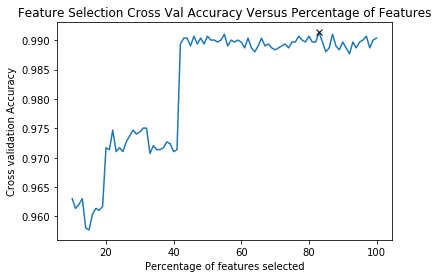

Optimal Percent: 83
Optimal Number of Features: 85
Features Chosen:
['RIDAGEYR' 'INDFMPIR' 'CBD070' 'CBD090' 'CBD120' 'CBD130' 'DBD895'
 'DBD900' 'DBD905' 'DBD910' 'PAD680' 'WHD010' 'WHD020' 'RIAGENDR_Female'
 'RIAGENDR_Male' 'RIDRETH1_Mexican_American' 'RIDRETH1_Non_Hispanic_Black'
 'RIDRETH1_Non_Hispanic_White' 'RIDRETH1_Other' 'RIDRETH1_Other_Hispanic'
 'DMDEDUC2_9th_to_12th_No_Grad' 'DMDEDUC2_College_Grad_And_Above'
 'DMDEDUC2_High_School_Grad_GED' 'DMDEDUC2_Less_Than_9th'
 'DMDEDUC2_Some_College_AA' 'DMDMARTL_Divorced' 'DMDMARTL_Living_W_Partner'
 'DMDMARTL_Married' 'DMDMARTL_Never_Married' 'DMDMARTL_Separated'
 'DMDMARTL_Widowed' 'INDHHIN2_100000_And_Over' 'INDHHIN2_10000_to_14999'
 'INDHHIN2_15000_to_19999' 'INDHHIN2_20000_to_24999'
 'INDHHIN2_35000_to_44999' 'INDHHIN2_45000_to_54999'
 'INDHHIN2_5000_to_9999' 'INDHHIN2_65000_to_74999'
 'INDHHIN2_75000_to_99999' 'BPQ020_No' 'BPQ020_Yes' 'DIQ010_Borderline'
 'DIQ010_No' 'DIQ010_Yes' 'MCQ080_No' 'MCQ080_Yes' 'MCQ365A_No'
 'MCQ365A_

[Parallel(n_jobs=1)]: Done 80000 out of 80000 | elapsed:  8.2min finished


In [73]:
cv = 10
dt = tree.DecisionTreeClassifier()
percentages = a = np.arange(10, 101, 1)

temp_leaf = np.arange(10, 201, 10)
temp_depth = np.arange(1, 11, 1)
#temp_leaf = np.arange(50, 101, 50)
#temp_depth = np.arange(5, 16, 10)

parameters = {
    'criterion': ['entropy','gini'],
    'max_depth': temp_depth,
    'min_samples_leaf': temp_leaf,
    'min_samples_split': temp_leaf
}

print 'Percentage List Used:'
print percentages
print '\n'
print 'Parameters Used:'
print parameters
print '\n'

dt_model, dt_all_info_df, dt_fs_info_df, dt_features = create_opt_model(dt, data_train_np, target_train_np, data_test_np, target_test_np, percentages, parameters, cv, spdsht_features)


In [74]:
treeObj = dt_model.tree_
print 'Number of nodes in the tree:'
print treeObj.node_count

Number of nodes in the tree:
15


In [75]:
dt_fs_info_df.to_csv('C:\\DePaul Coursework\\Fall 2017 CSC 478\\Final Project\\Outputs\\DT Chosen Features.csv')

In [76]:
dt_all_info_df.to_csv('C:\\DePaul Coursework\\Fall 2017 CSC 478\\Final Project\\Outputs\\DT All Features.csv')

In [77]:
feature_imp = dt_model.feature_importances_
feature_imp_arr = np.zeros((1, len(feature_imp)))
feature_imp_arr[0] = feature_imp

feature_imp_df = pd.DataFrame(feature_imp_arr, columns = dt_features)
feature_imp_df.to_csv('C:\\DePaul Coursework\\Fall 2017 CSC 478\\Final Project\\Outputs\\DT Feature Selection Importances.csv')
feature_imp_df

,RIDAGEYR,INDFMPIR,CBD070,CBD090,CBD120,CBD130,DBD900,DBD905,DBD910,PAD680,WHD020,RIAGENDR_Female,RIAGENDR_Male,RIDRETH1_Mexican_American,RIDRETH1_Non_Hispanic_Black,RIDRETH1_Other,RIDRETH1_Other_Hispanic,DMDEDUC2_College_Grad_And_Above,DMDEDUC2_High_School_Grad_GED,INDHHIN2_15000_to_19999,INDHHIN2_5000_to_9999,BPQ020_No,BPQ020_Yes,DIQ010_Yes,MCQ080_No,MCQ080_Yes,MCQ365A_No,MCQ365A_Yes,MCQ365B_No,MCQ365B_Yes,HUQ051_1,HUQ051_16_Or_More,HUQ071_Yes,MCQ010_No,MCQ010_Yes,MCQ160B_Yes,MCQ160M_Yes,MCQ160O_Yes
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.771317,0.166069,0.062614,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


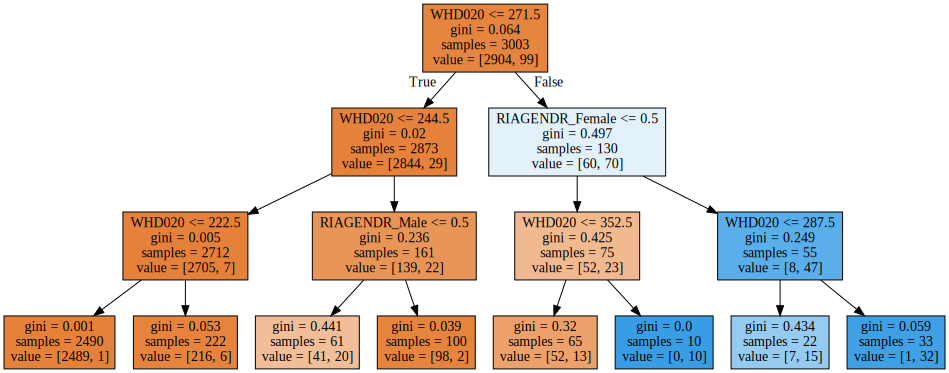

In [78]:
export_graphviz(dt_model, out_file='tree.dot', feature_names=dt_features, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [79]:
system(dot -Tpng tree.dot -o dtree.jpeg)

[]

# Decision Tree Classification With All Features

In [80]:
cv = 10
dt_all = tree.DecisionTreeClassifier()

temp_leaf = np.arange(10, 201, 10)
temp_depth = np.arange(1, 11, 1)
#temp_leaf = np.arange(50, 101, 50)
#temp_depth = np.arange(5, 16, 10)

parameters = {
    'criterion': ['entropy','gini'],
    'max_depth': temp_depth,
    'min_samples_leaf': temp_leaf,
    'min_samples_split': temp_leaf
}

print 'Parameters Used:'
print parameters
print '\n'

# Perform grid search with parameter dictionary passed in
opt_model = perform_grid_search(dt_all, data_train_np, target_train_np, data_test_np, target_test_np, parameters, cv)

# Perform grid search with parameter dictionary passed in
dt_model_all = model_data(opt_model, data_train_np, target_train_np, data_test_np, target_test_np, cv)


Parameters Used:
{'min_samples_split': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200]), 'criterion': ['entropy', 'gini'], 'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]), 'min_samples_leaf': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200])}


---------------------------------- Parameter Grid Search ----------------------------------
Fitting 10 folds for each of 8000 candidates, totalling 80000 fits


[Parallel(n_jobs=1)]: Done 80000 out of 80000 | elapsed: 16.6min finished


Wall time: 16min 37s


Grid Search Optimal Parameters: {'min_samples_split': 10, 'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 10}
Grid Search Optimal Parameter Score: 0.988011988012


Final Model Parameter Settings:
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=10,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


---------------------------------- Training Data Performance ----------------------------------


Final Model Training Set Cross Validation Results
-------------------------------------------------
10 Fold Cross Validation Training Accuracy:
0.991342007524
10 Fold Cross Validation Testing Accuracy:
0.986682170543


Final Model Full Training Set Results
-------------------------------------
Accuracy:
0.991008991009 

C

In [81]:
treeObjAll = dt_model_all.tree_
print 'Number of nodes in the tree:'
print treeObjAll.node_count

Number of nodes in the tree:
15


In [82]:
feature_imp = dt_model_all.feature_importances_
feature_imp_arr = np.zeros((1, len(feature_imp)))
feature_imp_arr[0] = feature_imp

feature_imp_df = pd.DataFrame(feature_imp_arr, columns = spdsht_features)
feature_imp_df.to_csv('C:\\DePaul Coursework\\Fall 2017 CSC 478\\Final Project\\Outputs\\DT Full Training Importances.csv')
feature_imp_df

,RIDAGEYR,INDFMPIR,CBD070,CBD090,CBD120,CBD130,DBD895,DBD900,DBD905,DBD910,PAD680,WHD010,WHD020,RIAGENDR_Female,RIAGENDR_Male,RIDRETH1_Mexican_American,RIDRETH1_Non_Hispanic_Black,RIDRETH1_Non_Hispanic_White,RIDRETH1_Other,RIDRETH1_Other_Hispanic,DMDEDUC2_9th_to_12th_No_Grad,DMDEDUC2_College_Grad_And_Above,DMDEDUC2_High_School_Grad_GED,DMDEDUC2_Less_Than_9th,DMDEDUC2_Some_College_AA,DMDMARTL_Divorced,DMDMARTL_Living_W_Partner,DMDMARTL_Married,DMDMARTL_Never_Married,DMDMARTL_Separated,DMDMARTL_Widowed,INDHHIN2_0_to_4999,INDHHIN2_100000_And_Over,INDHHIN2_10000_to_14999,INDHHIN2_15000_to_19999,INDHHIN2_20000_to_24999,INDHHIN2_25000_to_34999,INDHHIN2_35000_to_44999,INDHHIN2_45000_to_54999,INDHHIN2_5000_to_9999,INDHHIN2_55000_to_64999,INDHHIN2_65000_to_74999,INDHHIN2_75000_to_99999,BPQ020_No,BPQ020_Yes,DIQ010_Borderline,DIQ010_No,DIQ010_Yes,MCQ080_No,MCQ080_Yes,MCQ365A_No,MCQ365A_Yes,MCQ365B_No,MCQ365B_Yes,SMQ020_No,SMQ020_Yes,HEQ010_No,HEQ010_Yes,HEQ030_No,HEQ030_Yes,HUQ051_0,HUQ051_1,HUQ051_10_to_12,HUQ051_13_to_15,HUQ051_16_Or_More,HUQ051_2_to_3,HUQ051_4_to_5,HUQ051_6_to_7,HUQ051_8_to_9,HUQ071_No,HUQ071_Yes,MCQ010_No,MCQ010_Yes,MCQ082_No,MCQ082_Yes,MCQ086_No,MCQ086_Yes,MCQ160N_No,MCQ160N_Yes,MCQ160B_No,MCQ160B_Yes,MCQ160C_No,MCQ160C_Yes,MCQ160D_No,MCQ160D_Yes,MCQ160E_No,MCQ160E_Yes,MCQ160F_No,MCQ160F_Yes,MCQ160G_No,MCQ160G_Yes,MCQ160M_No,MCQ160M_Yes,MCQ160K_No,MCQ160K_Yes,MCQ160L_No,MCQ160L_Yes,MCQ160O_No,MCQ160O_Yes,MCQ203_No,MCQ203_Yes,MCQ220_No,MCQ220_Yes
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.399099,0.600901,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


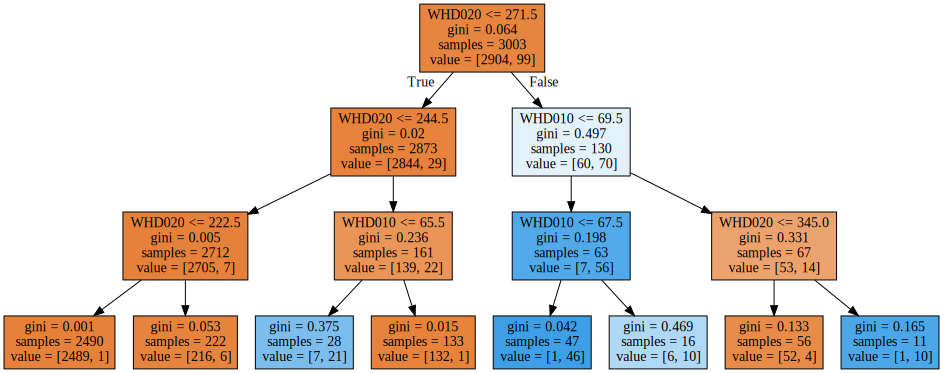

In [83]:
export_graphviz(dt_model_all, out_file='tree_all.dot', feature_names=spdsht_features, filled=True)

with open("tree_all.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [84]:
system(dot -Tpng tree_all.dot -o dtree_all.jpeg)

[]

# K Nearest Neighbor Classification With Feature Selection

Percentage List Used:
[ 10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27
  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45
  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63
  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81
  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99
 100]


Parameters Used:
{'n_neighbors': array([  5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,  65,
        70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125, 130,
       135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200]), 'weights': ['uniform', 'distance']}


---------------------------------- Feature Selection ----------------------------------


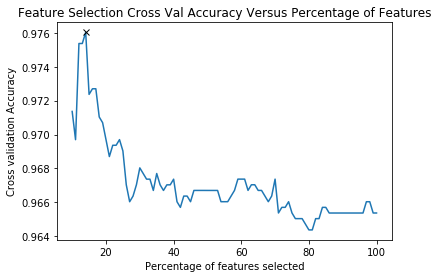

Optimal Percent: 14
Optimal Number of Features: 14
Features Chosen:
['WHD020' 'RIAGENDR_Female' 'RIAGENDR_Male' 'BPQ020_Yes' 'DIQ010_Yes'
 'MCQ080_No' 'MCQ080_Yes' 'MCQ365A_No' 'MCQ365A_Yes' 'MCQ365B_No'
 'MCQ365B_Yes' 'HUQ051_16_Or_More' 'MCQ010_Yes' 'MCQ160B_Yes' 'MCQ160O_Yes']


Feature Optimization (Removal of All Attributes with P Values >= 0.05)
----------------------------------------------------------------------
Final Number of Training Set Attributes: 15
Final Training Set Features Selection Accuracy: 0
Final Training Set Attributes:
['WHD020', 'RIAGENDR_Female', 'RIAGENDR_Male', 'BPQ020_Yes', 'DIQ010_Yes', 'MCQ080_No', 'MCQ080_Yes', 'MCQ365A_No', 'MCQ365A_Yes', 'MCQ365B_No', 'MCQ365B_Yes', 'HUQ051_16_Or_More', 'MCQ010_Yes', 'MCQ160B_Yes', 'MCQ160O_Yes']


---------------------------------- Parameter Grid Search ----------------------------------
Fitting 10 folds for each of 80 candidates, totalling 800 fits


[Parallel(n_jobs=1)]: Done 800 out of 800 | elapsed:   21.0s finished


Wall time: 21.1 s


Grid Search Optimal Parameters: {'n_neighbors': 5, 'weights': 'uniform'}
Grid Search Optimal Parameter Score: 0.976023976024


Final Model Parameter Settings:
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')


---------------------------------- Training Data Performance ----------------------------------


Final Model Training Set Cross Validation Results
-------------------------------------------------
10 Fold Cross Validation Training Accuracy:
0.980094012383
10 Fold Cross Validation Testing Accuracy:
0.9756910299


Final Model Full Training Set Results
-------------------------------------
Accuracy:
0.979686979687 

Classification Report:
             precision    recall  f1-score   support

          0       0.98      1.00      0.99      2904
          1       0.90      0.43      0.59        99

avg / total       0.98      0.98      0.98      3003


In [85]:
cv = 10
knn = neighbors.KNeighborsClassifier(p = 2)
percentages = a = np.arange(10, 101, 1)

temp_k = np.arange(5, 201, 5)
#temp_k = np.arange(20, 101, 20)

parameters = {
    'weights': ['uniform','distance'],
    'n_neighbors': temp_k
}

print 'Percentage List Used:'
print percentages
print '\n'
print 'Parameters Used:'
print parameters
print '\n'

knn_model, knn_all_info_df, knn_fs_info_df, knn_features = create_opt_model(knn, data_train_norm_np, target_train_np, data_test_norm_np, target_test_np, percentages, parameters, cv, spdsht_features)


In [86]:
knn_fs_info_df.to_csv('C:\\DePaul Coursework\\Fall 2017 CSC 478\\Final Project\\Outputs\\KNN Chosen Features.csv')

In [87]:
knn_all_info_df.to_csv('C:\\DePaul Coursework\\Fall 2017 CSC 478\\Final Project\\Outputs\\KNN All Features.csv')

# K Nearest Neighbor Classification With All Features

In [88]:
cv = 10
knn_all = neighbors.KNeighborsClassifier(p = 2)

temp_k = np.arange(5, 201, 5)
#temp_k = np.arange(20, 101, 20)

parameters = {
    'weights': ['uniform','distance'],
    'n_neighbors': temp_k
}

print 'Parameters Used:'
print parameters
print '\n'

# Perform grid search with parameter dictionary passed in
opt_model = perform_grid_search(knn_all, data_train_norm_np, target_train_np, data_test_norm_np, target_test_np, parameters, cv)

# Perform grid search with parameter dictionary passed in
knn_model_all = model_data(opt_model, data_train_norm_np, target_train_np, data_test_norm_np, target_test_np, cv)


Parameters Used:
{'n_neighbors': array([  5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,  65,
        70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125, 130,
       135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200]), 'weights': ['uniform', 'distance']}


---------------------------------- Parameter Grid Search ----------------------------------
Fitting 10 folds for each of 80 candidates, totalling 800 fits


[Parallel(n_jobs=1)]: Done 800 out of 800 | elapsed:  2.0min finished


Wall time: 2min 2s


Grid Search Optimal Parameters: {'n_neighbors': 10, 'weights': 'uniform'}
Grid Search Optimal Parameter Score: 0.967032967033


Final Model Parameter Settings:
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')


---------------------------------- Training Data Performance ----------------------------------


Final Model Training Set Cross Validation Results
-------------------------------------------------
10 Fold Cross Validation Training Accuracy:
0.967217922461
10 Fold Cross Validation Testing Accuracy:
0.967029900332


Final Model Full Training Set Results
-------------------------------------
Accuracy:
0.967365967366 

Classification Report:
             precision    recall  f1-score   support

          0       0.97      1.00      0.98      2904
          1       1.00      0.01      0.02        99

avg / total       0.97      0.97      0.95      

C:\Users\Kari\Anaconda3\envs\Python27\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Naive Bayes Gaussian Classification With Feature Selection

---------------------------------- Feature Selection ----------------------------------


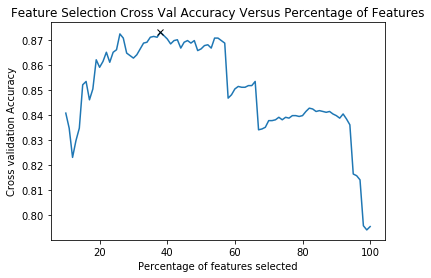

Optimal Percent: 38
Optimal Number of Features: 39
Features Chosen:
['RIDAGEYR' 'INDFMPIR' 'CBD070' 'CBD090' 'CBD120' 'CBD130' 'DBD900'
 'DBD905' 'DBD910' 'PAD680' 'WHD020' 'RIAGENDR_Female' 'RIAGENDR_Male'
 'RIDRETH1_Mexican_American' 'RIDRETH1_Non_Hispanic_Black' 'RIDRETH1_Other'
 'RIDRETH1_Other_Hispanic' 'DMDEDUC2_College_Grad_And_Above'
 'DMDEDUC2_High_School_Grad_GED' 'INDHHIN2_15000_to_19999'
 'INDHHIN2_5000_to_9999' 'BPQ020_No' 'BPQ020_Yes' 'DIQ010_Yes' 'MCQ080_No'
 'MCQ080_Yes' 'MCQ365A_No' 'MCQ365A_Yes' 'MCQ365B_No' 'MCQ365B_Yes'
 'HUQ051_1' 'HUQ051_16_Or_More' 'HUQ071_Yes' 'MCQ010_No' 'MCQ010_Yes'
 'MCQ160B_Yes' 'MCQ160D_Yes' 'MCQ160M_Yes' 'MCQ160O_Yes']


Feature Optimization (Removal of All Attributes with P Values >= 0.05)
----------------------------------------------------------------------
Final Number of Training Set Attributes: 38
Final Training Set Features Selection Accuracy: 0.87113593114
Final Training Set Attributes:
['RIDAGEYR', 'INDFMPIR', 'CBD070', 'CBD090', 

In [89]:
cv = 10
nbg = naive_bayes.GaussianNB()
percentages = a = np.arange(10, 101, 1)

opt_percent, opt_num, attr_ndx, attr_w, attr_p = find_percent(data_train_np, target_train_np, nbg, percentages, cv)
print 'Optimal Percent:', opt_percent
print 'Optimal Number of Features:', opt_num
print 'Features Chosen:'
print spdsht_features[attr_ndx]
print '\n'

train_fs_df, nbg_all_info_df, nbg_fs_info_df = optimize_features(data_train_np, target_train_np, nbg, spdsht_features, attr_ndx, attr_w, attr_p, cv)

# Get the training and testing data with chosen features
selected_features = train_fs_df.columns.values.tolist()
train_arr_fs = np.array(train_fs_df)  

test_df = pd.DataFrame(data_test_np, columns = spdsht_features)
test_fs_df = test_df[selected_features]                                                       
test_arr_fs = np.array(test_fs_df)
                                                              
nbg_model = model_data(nbg, train_arr_fs, target_train_np, test_arr_fs, target_test_np, cv)


In [90]:
nbg_fs_info_df.to_csv('C:\\DePaul Coursework\\Fall 2017 CSC 478\\Final Project\\Outputs\\NBG ChosenFeatures.csv')

In [91]:
nbg_all_info_df.to_csv('C:\\DePaul Coursework\\Fall 2017 CSC 478\\Final Project\\Outputs\\NBG All Features.csv')

# Naive Bayes Gaussian Classification With All Features

In [92]:
cv = 10
nbg_all = naive_bayes.GaussianNB()

nbg_model = model_data(nbg_all, data_train_np, target_train_np, data_test_np, target_test_np, cv)


---------------------------------- Training Data Performance ----------------------------------


Final Model Training Set Cross Validation Results
-------------------------------------------------
10 Fold Cross Validation Training Accuracy:
0.804860884622
10 Fold Cross Validation Testing Accuracy:
0.797541528239


Final Model Full Training Set Results
-------------------------------------
Accuracy:
0.808857808858 

Classification Report:
             precision    recall  f1-score   support

          0       0.99      0.81      0.89      2904
          1       0.13      0.88      0.23        99

avg / total       0.97      0.81      0.87      3003


Confussion Matrix:
[[2342  562]
 [  12   87]] 



---------------------------------- Testing Data Performance ----------------------------------


Final Model Testing Set Results
-------------------------------
Accuracy:
0.806924101198 

Classification Report:
             precision    recall  f1-score   support

          0       0.99    

# Naive Bayes Multinomial Classification With Feature Selection

---------------------------------- Feature Selection ----------------------------------


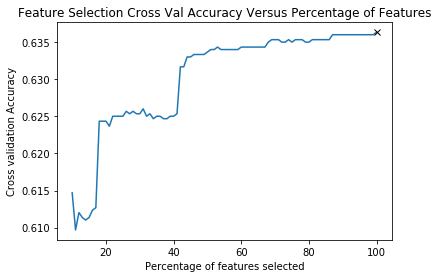

Optimal Percent: 100
Optimal Number of Features: 103
Features Chosen:
['RIDAGEYR' 'INDFMPIR' 'CBD070' 'CBD090' 'CBD120' 'CBD130' 'DBD895'
 'DBD900' 'DBD905' 'DBD910' 'PAD680' 'WHD010' 'WHD020' 'RIAGENDR_Female'
 'RIAGENDR_Male' 'RIDRETH1_Mexican_American' 'RIDRETH1_Non_Hispanic_Black'
 'RIDRETH1_Non_Hispanic_White' 'RIDRETH1_Other' 'RIDRETH1_Other_Hispanic'
 'DMDEDUC2_9th_to_12th_No_Grad' 'DMDEDUC2_College_Grad_And_Above'
 'DMDEDUC2_High_School_Grad_GED' 'DMDEDUC2_Less_Than_9th'
 'DMDEDUC2_Some_College_AA' 'DMDMARTL_Divorced' 'DMDMARTL_Living_W_Partner'
 'DMDMARTL_Married' 'DMDMARTL_Never_Married' 'DMDMARTL_Separated'
 'DMDMARTL_Widowed' 'INDHHIN2_0_to_4999' 'INDHHIN2_100000_And_Over'
 'INDHHIN2_10000_to_14999' 'INDHHIN2_15000_to_19999'
 'INDHHIN2_20000_to_24999' 'INDHHIN2_25000_to_34999'
 'INDHHIN2_35000_to_44999' 'INDHHIN2_45000_to_54999'
 'INDHHIN2_5000_to_9999' 'INDHHIN2_55000_to_64999'
 'INDHHIN2_65000_to_74999' 'INDHHIN2_75000_to_99999' 'BPQ020_No'
 'BPQ020_Yes' 'DIQ010_Borderlin

In [93]:
cv = 10
nbm = naive_bayes.MultinomialNB()
percentages = a = np.arange(10, 101, 1)

opt_percent, opt_num, attr_ndx, attr_w, attr_p = find_percent(data_train_np, target_train_np, nbm, percentages, cv)
print 'Optimal Percent:', opt_percent
print 'Optimal Number of Features:', opt_num
print 'Features Chosen:'
print spdsht_features[attr_ndx]
print '\n'

train_fs_df, nbm_all_info_df, nbm_fs_info_df = optimize_features(data_train_np, target_train_np, nbm, spdsht_features, attr_ndx, attr_w, attr_p, cv)

# Get the training and testing data with chosen features
selected_features = train_fs_df.columns.values.tolist()
train_arr_fs = np.array(train_fs_df)  

test_df = pd.DataFrame(data_test_np, columns = spdsht_features)
test_fs_df = test_df[selected_features]                                                       
test_arr_fs = np.array(test_fs_df)


nbm_model = model_data(nbm, train_arr_fs, target_train_np, test_arr_fs, target_test_np, cv)


In [94]:
nbm_fs_info_df.to_csv('C:\\DePaul Coursework\\Fall 2017 CSC 478\\Final Project\\Outputs\\NBM Chosen Features.csv')

In [95]:
nbm_all_info_df.to_csv('C:\\DePaul Coursework\\Fall 2017 CSC 478\\Final Project\\Outputs\\NBM All Features.csv')

# Naive Bayes Multinomial Classification With All Features

In [96]:
cv = 10
nbm_all = naive_bayes.MultinomialNB()

nbm_model = model_data(nbm_all, data_train_np, target_train_np, data_test_np, target_test_np, cv)


---------------------------------- Training Data Performance ----------------------------------


Final Model Training Set Cross Validation Results
-------------------------------------------------
10 Fold Cross Validation Training Accuracy:
0.635919502223
10 Fold Cross Validation Testing Accuracy:
0.634349944629


Final Model Full Training Set Results
-------------------------------------
Accuracy:
0.636363636364 

Classification Report:
             precision    recall  f1-score   support

          0       0.99      0.63      0.77      2904
          1       0.06      0.73      0.12        99

avg / total       0.96      0.64      0.75      3003


Confussion Matrix:
[[1839 1065]
 [  27   72]] 



---------------------------------- Testing Data Performance ----------------------------------


Final Model Testing Set Results
-------------------------------
Accuracy:
0.660452729694 

Classification Report:
             precision    recall  f1-score   support

          0       0.99    

# Linear Discriminant Analysis Classification With All Features

In [97]:
cv = 10
lda_all = LinearDiscriminantAnalysis()

lda_model = model_data(lda_all, data_train_np, target_train_np, data_test_np, target_test_np, cv)


---------------------------------- Training Data Performance ----------------------------------


Final Model Training Set Cross Validation Results
-------------------------------------------------


C:\Users\Kari\Anaconda3\envs\Python27\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


10 Fold Cross Validation Training Accuracy:
0.991822995695
10 Fold Cross Validation Testing Accuracy:
0.98834440753


Final Model Full Training Set Results
-------------------------------------
Accuracy:
0.991341991342 

Classification Report:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      2904
          1       0.87      0.87      0.87        99

avg / total       0.99      0.99      0.99      3003


Confussion Matrix:
[[2891   13]
 [  13   86]] 



---------------------------------- Testing Data Performance ----------------------------------


Final Model Testing Set Results
-------------------------------
Accuracy:
0.988015978695 

Classification Report:
             precision    recall  f1-score   support

          0       0.99      0.99      0.99       723
          1       0.83      0.86      0.84        28

avg / total       0.99      0.99      0.99       751


Confussion Matrix:
[[718   5]
 [  4  24]] 



# ----------------------------------- K Means Clustering ----------------------------------------------

# Create Function Needed For K Means Clustering

In [98]:
def find_opt_k(data_train, k_vals, tol):
    
    all_sse_dist = []
    for i in k_vals:
        kmeans = KMeans(n_clusters = i, max_iter = 500, verbose = 0, n_init = 5, init = "k-means++")
        kmeans.fit(data_train)
        clusters = kmeans.predict(data_train)
        centers = kmeans.cluster_centers_

        sum_sse_dist = calc_cluster_error(centers, clusters, data_train)        
        all_sse_dist.append(sum_sse_dist)

    all_sse_dist = np.array(all_sse_dist)
    # find the elementwise difference in the all_sse_dist array
    temp_diff = np.diff(all_sse_dist)
    # multiply this diff slope array by -1 to make all neg slopes pos and vis versa (for use with tolerance)
    #find the indices where the diff slope is greater than the tolerance
    temp_ndx = np.where(temp_diff > tol)[0]
    # increment the first index found by 1 to set it to the corresponding point in the values array
    opt_ndx = temp_ndx[0] + 1
    # extract the optimal param value using the index above
    optimal_k = k[opt_ndx]
    
    print 'Optimal K Value:', optimal_k

    plt.figure()
    plt.xlabel("K Values")
    plt.ylabel("Cluster SSE")
    plt.title('Cluster SSE Versus K Values')   
    plt.plot(k, all_sse_dist)
    plt.plot(optimal_k, all_sse_dist[opt_ndx], 'x', c='k')
    plt.show()   

    plt.figure()
    plt.xlabel("K Values")
    plt.ylabel("Cluster SSE Diff")
    plt.title('Cluster SSE Diff Versus K Values')   
    plt.plot(k[1:len(k)], temp_diff)
    plt.plot(optimal_k, temp_diff[opt_ndx-1], 'x', c='k')
    plt.show()   
    
    return optimal_k


In [99]:
def calc_cluster_error(centers, clusters, data_train):
    
    uniq_clusters = np.array(np.unique(clusters))
    
    sse_dist_cent = []
    for j in uniq_clusters:
        cluster_center = centers[j]
        cluster_ndx = clusters == j
        cluster_pts = data_train[cluster_ndx]
        center_arr = np.ones((cluster_pts.shape[0], cluster_pts.shape[1])) * cluster_center

        dist_to_center = cluster_pts - center_arr
        sq_dist_center = np.square(dist_to_center)
        sum_sq_dist = sq_dist_center.sum(axis=1)
        sum_sse_dist = sum_sq_dist.sum(axis=0)
        sse_dist_cent.append(sum_sse_dist)

    sse_dist_cent = np.array(sse_dist_cent)
    sum_sse_dist = sse_dist_cent.sum()
    
    return sum_sse_dist
    

# Create full dataset numpy array

In [100]:
data_train_all = np.array(train_df_spdsht)
target_all = np.array(target_df)

# Create normalized full training data

In [101]:
min_max_scaler = preprocessing.MinMaxScaler().fit(train_df_spdsht)
data_all_norm_np = min_max_scaler.transform(train_df_spdsht)


# K Means Clustering With Full Training Set

Optimal K Value: 8


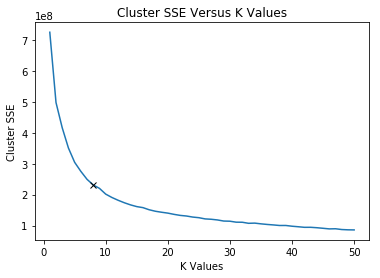

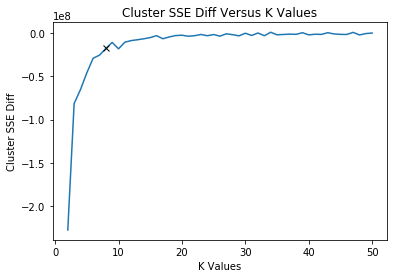

In [102]:
k = np.arange(1, 51, 1)
tol = -0.2 * (10**8)

optimal_k = find_opt_k(data_train_all, k, tol)

In [103]:
kmeans = KMeans(n_clusters = optimal_k, max_iter = 500, verbose = 0, n_init = 5, init = "k-means++")
kmeans.fit(data_train_all)
clusters = kmeans.predict(data_train_all)
centers = kmeans.cluster_centers_


In [104]:
sse_center_dist = calc_cluster_error(centers, clusters, data_train_all)
print 'Total Clustering Sum Squared Error:'
print sse_center_dist

Total Clustering Sum Squared Error:
231265897.135


In [105]:
cluster_names = []
uniq_cluster = np.unique(clusters)
for i in uniq_cluster:
    temp_str = 'Cluster_' + str(i)
    cluster_names.append(temp_str)


In [106]:
spdsht_features = np.array(train_df_spdsht.columns.values.tolist())
centroid_df = pd.DataFrame(centers, index = cluster_names)
centroid_df.columns = spdsht_features
centroid_df

,RIDAGEYR,INDFMPIR,CBD070,CBD090,CBD120,CBD130,DBD895,DBD900,DBD905,DBD910,PAD680,WHD010,WHD020,RIAGENDR_Female,RIAGENDR_Male,RIDRETH1_Mexican_American,RIDRETH1_Non_Hispanic_Black,RIDRETH1_Non_Hispanic_White,RIDRETH1_Other,RIDRETH1_Other_Hispanic,DMDEDUC2_9th_to_12th_No_Grad,DMDEDUC2_College_Grad_And_Above,DMDEDUC2_High_School_Grad_GED,DMDEDUC2_Less_Than_9th,DMDEDUC2_Some_College_AA,DMDMARTL_Divorced,DMDMARTL_Living_W_Partner,DMDMARTL_Married,DMDMARTL_Never_Married,DMDMARTL_Separated,DMDMARTL_Widowed,INDHHIN2_0_to_4999,INDHHIN2_100000_And_Over,INDHHIN2_10000_to_14999,INDHHIN2_15000_to_19999,INDHHIN2_20000_to_24999,INDHHIN2_25000_to_34999,INDHHIN2_35000_to_44999,INDHHIN2_45000_to_54999,INDHHIN2_5000_to_9999,INDHHIN2_55000_to_64999,INDHHIN2_65000_to_74999,INDHHIN2_75000_to_99999,BPQ020_No,BPQ020_Yes,DIQ010_Borderline,DIQ010_No,DIQ010_Yes,MCQ080_No,MCQ080_Yes,MCQ365A_No,MCQ365A_Yes,MCQ365B_No,MCQ365B_Yes,SMQ020_No,SMQ020_Yes,HEQ010_No,HEQ010_Yes,HEQ030_No,HEQ030_Yes,HUQ051_0,HUQ051_1,HUQ051_10_to_12,HUQ051_13_to_15,HUQ051_16_Or_More,HUQ051_2_to_3,HUQ051_4_to_5,HUQ051_6_to_7,HUQ051_8_to_9,HUQ071_No,HUQ071_Yes,MCQ010_No,MCQ010_Yes,MCQ082_No,MCQ082_Yes,MCQ086_No,MCQ086_Yes,MCQ160N_No,MCQ160N_Yes,MCQ160B_No,MCQ160B_Yes,MCQ160C_No,MCQ160C_Yes,MCQ160D_No,MCQ160D_Yes,MCQ160E_No,MCQ160E_Yes,MCQ160F_No,MCQ160F_Yes,MCQ160G_No,MCQ160G_Yes,MCQ160M_No,MCQ160M_Yes,MCQ160K_No,MCQ160K_Yes,MCQ160L_No,MCQ160L_Yes,MCQ160O_No,MCQ160O_Yes,MCQ203_No,MCQ203_Yes,MCQ220_No,MCQ220_Yes
Cluster_0,44.483296,3.124388,930.066815,92.663697,233.859688,40.440980,3.957684,1.663697,3.077951,2.346608,399.494213,66.533175,178.574490,0.503341,0.496659,0.140312,0.082405,0.501114,0.189310,0.086860,0.138085,0.347439,0.178174,0.060134,0.276169,0.051225,0.055679,0.703786,0.153675,1.336303e-02,0.022272,4.454343e-03,0.447661,3.340757e-02,3.118040e-02,5.567929e-02,0.075724,6.458797e-02,0.091314,0.006682,5.345212e-02,0.046771,0.089087,0.737194,0.262806,0.035635,0.859688,0.104677,0.621381,0.378619,0.688196,0.311804,0.630290,0.369710,0.567929,0.432071,0.986637,1.336303e-02,0.991091,8.908686e-03,0.155902,0.233853,0.062361,1.559020e-02,0.048998,0.267261,0.133630,0.046771,3.563474e-02,0.915367,0.084633,0.859688,0.140312,0.991091,8.908686e-03,0.984410,0.015590,0.964365,3.563474e-02,0.988864,1.113586e-02,0.991091,0.008909,0.991091,8.908686e-03,0.988864,1.113586e-02,0.988864,0.011136,0.997773,2.227171e-03,0.902004,0.097996,0.962138,0.037862,0.948775,0.051225,0.986637,1.336303e-02,0.984410,1.559020e-02,0.915367,0.084633
Cluster_1,50.844037,2.438589,201.141055,16.025476,92.181193,18.975917,4.119266,2.113532,2.299957,2.810643,570.221217,66.500687,184.066328,0.535550,0.464450,0.058486,0.313073,0.467890,0.106651,0.053899,0.095183,0.259174,0.255734,0.037844,0.352064,0.183486,0.063073,0.381881,0.230505,3.784404e-02,0.103211,2.637615e-02,0.118119,1.123853e-01,7.683486e-02,8.256881e-02,0.133028,1.238532e-01,0.105505,0.038991,5.389908e-02,0.041284,0.087156,0.547018,0.452982,0.040138,0.809633,0.150229,0.583716,0.416284,0.683486,0.316514,0.568807,0.431193,0.555046,0.444954,0.993119,6.880734e-03,0.981651,1.834862e-02,0.108945,0.165138,0.055046,2.866972e-02,0.069954,0.303899,0.152523,0.079128,3.669725e-02,0.856651,0.143349,0.809633,0.190367,0.995413,4.587156e-03,0.988532,0.011468,0.957569,4.243119e-02,0.963303,3.669725e-02,0.947248,0.052752,0.972477,2.752294e-02,0.958716,4.128440e-02,0.950688,0.049312,0.981651,1.834862e-02,0.883028,0.116972,0.938073,0.061927,0.961009,0.038991,0.951835,4.816514e-02,0.971330,2.866972e-02,0.876147,0.123853
Cluster_2,48.488506,2.214583,196.798851,17.886494,92.061782,18.900862,3.840517,2.007184,2.029905,3.075077,245.367816,66.401723,175.804520,0.537356,0.462644,0.113506,0.229885,0.454023,0.100575,0.102011,0.143678,0.215517,0.238506,0.067529,0.334770,0.160920,0.070402,0.397989,0.254310,3.017241e-02,0.086207,1.867816e-02,0.099138,8.333333e-02,8.620690e-02,1.163793e-01,0.132184,1.034483e-01,0.084770,0.076149,7.327586e-02,0.053161,0.073276,0.653736,0.346264,0.028736,0.88074

In [107]:
centroid_df.to_csv('C:\\DePaul Coursework\\Fall 2017 CSC 478\\Final Project\\Outputs\\NHANES Optimal Clusters.csv')

# K Means Clustering With Normalized Full Training Set 

Optimal K Value: 10


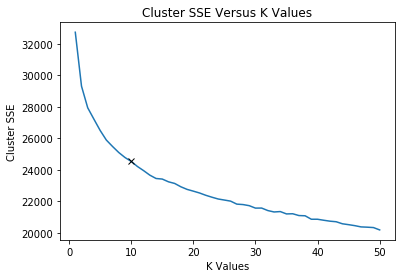

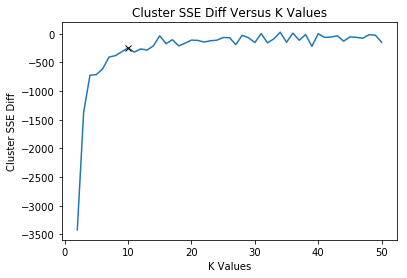

In [108]:
k = np.arange(1, 51, 1)
tol = -250

optimal_k = find_opt_k(data_all_norm_np, k, tol)

In [109]:
kmeans = KMeans(n_clusters = optimal_k, max_iter = 500, verbose = 0, n_init = 5, init = "k-means++")
kmeans.fit(data_all_norm_np)
clusters = kmeans.predict(data_all_norm_np)
centers = kmeans.cluster_centers_


In [110]:
sse_center_dist = calc_cluster_error(centers, clusters, data_all_norm_np)
print 'Total Clustering Sum Squared Error:'
print sse_center_dist

Total Clustering Sum Squared Error:
24492.3670858


In [111]:
cluster_names = []
uniq_cluster = np.unique(clusters)
for i in uniq_cluster:
    temp_str = 'Cluster_' + str(i)
    cluster_names.append(temp_str)


In [112]:
centroid_df = pd.DataFrame(centers, index = cluster_names)
centroid_df.columns = spdsht_features
centroid_df

,RIDAGEYR,INDFMPIR,CBD070,CBD090,CBD120,CBD130,DBD895,DBD900,DBD905,DBD910,PAD680,WHD010,WHD020,RIAGENDR_Female,RIAGENDR_Male,RIDRETH1_Mexican_American,RIDRETH1_Non_Hispanic_Black,RIDRETH1_Non_Hispanic_White,RIDRETH1_Other,RIDRETH1_Other_Hispanic,DMDEDUC2_9th_to_12th_No_Grad,DMDEDUC2_College_Grad_And_Above,DMDEDUC2_High_School_Grad_GED,DMDEDUC2_Less_Than_9th,DMDEDUC2_Some_College_AA,DMDMARTL_Divorced,DMDMARTL_Living_W_Partner,DMDMARTL_Married,DMDMARTL_Never_Married,DMDMARTL_Separated,DMDMARTL_Widowed,INDHHIN2_0_to_4999,INDHHIN2_100000_And_Over,INDHHIN2_10000_to_14999,INDHHIN2_15000_to_19999,INDHHIN2_20000_to_24999,INDHHIN2_25000_to_34999,INDHHIN2_35000_to_44999,INDHHIN2_45000_to_54999,INDHHIN2_5000_to_9999,INDHHIN2_55000_to_64999,INDHHIN2_65000_to_74999,INDHHIN2_75000_to_99999,BPQ020_No,BPQ020_Yes,DIQ010_Borderline,DIQ010_No,DIQ010_Yes,MCQ080_No,MCQ080_Yes,MCQ365A_No,MCQ365A_Yes,MCQ365B_No,MCQ365B_Yes,SMQ020_No,SMQ020_Yes,HEQ010_No,HEQ010_Yes,HEQ030_No,HEQ030_Yes,HUQ051_0,HUQ051_1,HUQ051_10_to_12,HUQ051_13_to_15,HUQ051_16_Or_More,HUQ051_2_to_3,HUQ051_4_to_5,HUQ051_6_to_7,HUQ051_8_to_9,HUQ071_No,HUQ071_Yes,MCQ010_No,MCQ010_Yes,MCQ082_No,MCQ082_Yes,MCQ086_No,MCQ086_Yes,MCQ160N_No,MCQ160N_Yes,MCQ160B_No,MCQ160B_Yes,MCQ160C_No,MCQ160C_Yes,MCQ160D_No,MCQ160D_Yes,MCQ160E_No,MCQ160E_Yes,MCQ160F_No,MCQ160F_Yes,MCQ160G_No,MCQ160G_Yes,MCQ160M_No,MCQ160M_Yes,MCQ160K_No,MCQ160K_Yes,MCQ160L_No,MCQ160L_Yes,MCQ160O_No,MCQ160O_Yes,MCQ203_No,MCQ203_Yes,MCQ220_No,MCQ220_Yes
Cluster_0,0.662988,0.517648,0.092762,0.020206,0.072467,0.023210,0.158559,0.089661,0.010825,0.012421,0.359376,0.680039,0.374779,4.504505e-03,9.954955e-01,0.126126,0.243243,0.468468,0.076577,0.085586,0.076577,0.202703,0.270270,0.090090,0.360360,0.130631,0.036036,0.653153,0.094595,0.027027,0.058559,0.009009,0.144144,4.504505e-02,0.081081,0.121622,0.099099,0.135135,0.090090,2.702703e-02,0.103604,0.058559,0.085586,7.657658e-02,9.234234e-01,0.108108,0.400901,0.490991,0.130631,0.869369,0.067568,0.932432,0.130631,0.869369,3.738739e-01,6.261261e-01,0.995495,0.004505,0.981982,0.018018,0.004505,0.076577,0.135135,0.031532,0.117117,0.216216,0.202703,0.135135,0.081081,0.729730,0.270270,0.792793,0.207207,1.000000,7.806256e-18,0.990991,0.009009,0.806306,0.193694,0.878378,1.216216e-01,0.837838,1.621622e-01,0.882883,0.117117,0.824324,0.175676,0.923423,0.076577,0.950450,4.954955e-02,0.927928,0.072072,0.927928,0.072072,0.945946,0.054054,0.896396,1.036036e-01,0.968468,0.031532,0.801802,0.198198
Cluster_1,0.596161,0.493391,0.093769,0.023847,0.065858,0.023881,0.120812,0.083396,0.010866,0.017480,0.376313,0.494977,0.309338,9.973822e-01,2.617801e-03,0.117801,0.272251,0.460733,0.070681,0.078534,0.128272,0.162304,0.272251,0.062827,0.374346,0.159686,0.041885,0.465969,0.133508,0.049738,0.149215,0.018325,0.146597,8.376963e-02,0.089005,0.089005,0.112565,0.125654,0.073298,5.235602e-02,0.068063,0.054974,0.086387,7.853403e-03,9.921466e-01,0.049738,0.628272,0.321990,0.081152,0.918848,0.133508,0.866492,0.112565,0.887435,5.759162e-01,4.240838e-01,0.989529,0.010471,0.976440,0.023560,0.018325,0.078534,0.104712,0.036649,0.102094,0.256545,0.238220,0.117801,0.047120,0.782723,0.217277,0.706806,0.293194,0.997382,2.617801e-03,0.989529,0.010471,0.963351,0.036649,0.918848,8.115183e-02,0.958115,4.188482e-02,0.960733,0.039267,0.952880,0.047120,0.945026,0.054974,0.973822,2.617801e-02,0.725131,0.274869,0.848168,0.151832,0.913613,0.086387,0.942408,5.759162e-02,0.979058,0.020942,0.866492,0.133508
Cluster_2,0.433206,0.674222,0.117469,0.029074,0.115962,0.027968,0.199808,0.100712,0.012644,0.020757,0.379952,0.673132,0.341372,-1.110223e-15,1.000000e+00,0.172414,0.126437,0.467433,0.164751,0.068966,0.072797,0.409962,0.172414,0.053640,0.291188,0.053640,0.057471,0.678161,0.187739,0.007663,0.015326,0.011494,0.394636,2.298851e-02,0.026820,0.038314,0.076628,0.061303,0.080460,7.662835e-03,0.072797,0.049808,0.157088,7.279693e-01,2.720307e-01,0.038314,0.881226,0.080460,0.237548,0.762452,0.107280,0.892720,0.072797,0.927203,6.130268e-01,3.86973

In [113]:
centroid_df.to_csv('C:\\DePaul Coursework\\Fall 2017 CSC 478\\Final Project\\Outputs\\NHANES Optimal Clusters Norm.csv')

# K Means Clustering With K = 2 For Scoring on Full Training

In [114]:
kmeans = KMeans(n_clusters = 2, max_iter = 500, verbose = 0, n_init = 5, init = "k-means++")
kmeans.fit(data_train_all)
clusters = kmeans.predict(data_train_all)
centers = kmeans.cluster_centers_

In [115]:
sse_center_dist = calc_cluster_error(centers, clusters, data_train_all)
print 'Total Clustering Sum Squared Error:'
print sse_center_dist

Total Clustering Sum Squared Error:
497551958.764


In [116]:
print 'Clustering Completeness Score:', completeness_score(target_all, clusters)

Clustering Completeness Score: 0.000326377661238


In [117]:
print 'Clustering Homogeneity Score:', homogeneity_score(target_all, clusters)

Clustering Homogeneity Score: 0.00105871216439


# K Means Clustering With K = 2 For Scoring on Normalized Full Training

In [118]:
kmeans = KMeans(n_clusters = 2, max_iter = 500, verbose = 0, n_init = 5, init = "k-means++")
kmeans.fit(data_all_norm_np)
clusters = kmeans.predict(data_all_norm_np)
centers = kmeans.cluster_centers_

In [119]:
sse_center_dist = calc_cluster_error(centers, clusters, data_all_norm_np)
print 'Total Clustering Sum Squared Error:'
print sse_center_dist

Total Clustering Sum Squared Error:
29318.7896227


In [120]:
print 'Clustering Completeness Score:', completeness_score(target_all, clusters)

Clustering Completeness Score: 0.0302329175289


In [121]:
print 'Clustering Homogeneity Score:', homogeneity_score(target_all, clusters)

Clustering Homogeneity Score: 0.132223265111


# Create Functions Needed For K Means Clustering Prediction On Split Data

In [122]:
def classify_rocchio(proto_vectors, training_classes, test_inst):

    proto_norm = np.array([np.linalg.norm(proto_vectors[i]) for i in range(len(proto_vectors))])
    test_case_norm = np.linalg.norm(test_inst)
    sims = np.dot(proto_vectors, test_inst) / (proto_norm * test_case_norm)
    dists = 1 - sims
    
    idx = np.argsort(dists) # sorting
    
    return training_classes[idx[0]], dists[idx]


In [123]:
def perform_rocchio(proto_vectors, train_classes, test_data, test_classes, verbose = 0):

    num_tests = test_data.shape[0]
    uniq_classes = np.unique(train_classes)
    
    if verbose == 1:
        print 'Doc Number\tPred Class\tActual Class\tEuclidean Distance'
    
    num_correct = 0
    for x in range(num_tests):
        pred_class, distances = classify_rocchio(proto_vectors, uniq_classes, test_data[x,:])
        if pred_class == test_classes[x]:
            num_correct += 1
            
        if verbose == 1:
            print '{}\t\t{}\t\t{}\t\t{}'.format(x, int(pred_class), test_classes[x], distances[0]) 
    calc_accuracy = float(num_correct) / num_tests
    
    return calc_accuracy


# K Means With K = 2 For Scoring And Prediction on Split Data

In [124]:
kmeans = KMeans(n_clusters = 2, max_iter = 500, verbose = 0, n_init = 5, init = "k-means++")
kmeans.fit(data_train_np)
clusters = kmeans.predict(data_train_np)
centers = kmeans.cluster_centers_

In [125]:
sse_center_dist = calc_cluster_error(centers, clusters, data_train_np)
print 'Total Clustering Sum Squared Error:'
print sse_center_dist

Total Clustering Sum Squared Error:
406365306.81


In [126]:
print 'Clustering Completeness Score:', completeness_score(target_train_np, clusters)

Clustering Completeness Score: 0.000250870251492


In [127]:
print 'Clustering Homogeneity Score:', homogeneity_score(target_train_np, clusters)

Clustering Homogeneity Score: 0.000824299250945


In [128]:
acc = perform_rocchio(centers, clusters, data_train_np, target_train_np)
print 'Clustering Prediction Accuracy of Training Data:', acc

Clustering Prediction Accuracy of Training Data: 0.648018648019


In [129]:
acc = perform_rocchio(centers, clusters, data_test_np, target_test_np)
print 'Clustering Prediction Accuracy of Testing Data:', acc

Clustering Prediction Accuracy of Testing Data: 0.607190412783


# K Means With K = 2 For Scoring And Prediction on Normalized Split Data

In [130]:
kmeans = KMeans(n_clusters = 2, max_iter = 500, verbose = 0, n_init = 5, init = "k-means++")
kmeans.fit(data_train_norm_np)
clusters = kmeans.predict(data_train_norm_np)
centers = kmeans.cluster_centers_

In [131]:
sse_center_dist = calc_cluster_error(centers, clusters, data_train_norm_np)
print 'Total Clustering Sum Squared Error:'
print sse_center_dist

Total Clustering Sum Squared Error:
23474.1633333


In [132]:
print 'Clustering Completeness Score:', completeness_score(target_train_np, clusters)

Clustering Completeness Score: 0.0304523930616


In [133]:
print 'Clustering Homogeneity Score:', homogeneity_score(target_train_np, clusters)

Clustering Homogeneity Score: 0.136143946394


In [134]:
acc = perform_rocchio(centers, clusters, data_train_norm_np, target_train_np)
print 'Clustering Prediction Accuracy of Training Data:', acc

Clustering Prediction Accuracy of Training Data: 0.67698967699


In [135]:
acc = perform_rocchio(centers, clusters, data_test_norm_np, target_test_np)
print 'Clustering Prediction Accuracy of Testing Data:', acc

Clustering Prediction Accuracy of Testing Data: 0.687083888149


# Perform PCA on the Normalized Full Training Set

In [136]:
num_features = data_all_norm_np.shape[1]
pca_norm = decomposition.PCA(n_components = num_features)
data_full_norm_trans = pca_norm.fit(data_all_norm_np).transform(data_all_norm_np)

In [137]:
np.set_printoptions(precision=2, suppress=True)

In [138]:
var_explained = pca_norm.explained_variance_ratio_
print 'Variance Explained By PCA Components = ', var_explained.sum()
print var_explained

Variance Explained By PCA Components =  1.0
[ 0.13  0.07  0.06  0.05  0.05  0.04  0.03  0.03  0.03  0.03  0.03  0.02
  0.02  0.02  0.02  0.02  0.02  0.02  0.02  0.02  0.01  0.01  0.01  0.01
  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01
  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.  ]


In [139]:
val = np.arange(1,len(var_explained), 1)
desired_var = 0.90

for i in val:
    temp_sum = var_explained[0:i].sum()
    if temp_sum > desired_var:
        break
        
num_pca_features = i
print 'Variance Explained By', num_pca_features, 'PCA Components = ', var_explained[0:num_pca_features].sum()

Variance Explained By 38 PCA Components =  0.902581000157


In [140]:
pca_norm = decomposition.PCA(n_components = num_pca_features)
data_full_norm_trans = pca_norm.fit(data_all_norm_np).transform(data_all_norm_np)

In [141]:
var_explained = pca_norm.explained_variance_ratio_
print 'Variance Explained By First', num_pca_features, '=', var_explained.sum()
print var_explained

Variance Explained By First 38 = 0.902479565796
[ 0.13  0.07  0.06  0.05  0.05  0.04  0.03  0.03  0.03  0.03  0.03  0.02
  0.02  0.02  0.02  0.02  0.02  0.02  0.02  0.02  0.01  0.01  0.01  0.01
  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01
  0.01  0.01]


In [142]:
pca_comps_norm = pca_norm.components_
pca_comp_norm_df = pd.DataFrame(pca_comps_norm, columns = spdsht_features)
pca_comp_norm_df.head()

,RIDAGEYR,INDFMPIR,CBD070,CBD090,CBD120,CBD130,DBD895,DBD900,DBD905,DBD910,PAD680,WHD010,WHD020,RIAGENDR_Female,RIAGENDR_Male,RIDRETH1_Mexican_American,RIDRETH1_Non_Hispanic_Black,RIDRETH1_Non_Hispanic_White,RIDRETH1_Other,RIDRETH1_Other_Hispanic,DMDEDUC2_9th_to_12th_No_Grad,DMDEDUC2_College_Grad_And_Above,DMDEDUC2_High_School_Grad_GED,DMDEDUC2_Less_Than_9th,DMDEDUC2_Some_College_AA,DMDMARTL_Divorced,DMDMARTL_Living_W_Partner,DMDMARTL_Married,DMDMARTL_Never_Married,DMDMARTL_Separated,DMDMARTL_Widowed,INDHHIN2_0_to_4999,INDHHIN2_100000_And_Over,INDHHIN2_10000_to_14999,INDHHIN2_15000_to_19999,INDHHIN2_20000_to_24999,INDHHIN2_25000_to_34999,INDHHIN2_35000_to_44999,INDHHIN2_45000_to_54999,INDHHIN2_5000_to_9999,INDHHIN2_55000_to_64999,INDHHIN2_65000_to_74999,INDHHIN2_75000_to_99999,BPQ020_No,BPQ020_Yes,DIQ010_Borderline,DIQ010_No,DIQ010_Yes,MCQ080_No,MCQ080_Yes,MCQ365A_No,MCQ365A_Yes,MCQ365B_No,MCQ365B_Yes,SMQ020_No,SMQ020_Yes,HEQ010_No,HEQ010_Yes,HEQ030_No,HEQ030_Yes,HUQ051_0,HUQ051_1,HUQ051_10_to_12,HUQ051_13_to_15,HUQ051_16_Or_More,HUQ051_2_to_3,HUQ051_4_to_5,HUQ051_6_to_7,HUQ051_8_to_9,HUQ071_No,HUQ071_Yes,MCQ010_No,MCQ010_Yes,MCQ082_No,MCQ082_Yes,MCQ086_No,MCQ086_Yes,MCQ160N_No,MCQ160N_Yes,MCQ160B_No,MCQ160B_Yes,MCQ160C_No,MCQ160C_Yes,MCQ160D_No,MCQ160D_Yes,MCQ160E_No,MCQ160E_Yes,MCQ160F_No,MCQ160F_Yes,MCQ160G_No,MCQ160G_Yes,MCQ160M_No,MCQ160M_Yes,MCQ160K_No,MCQ160K_Yes,MCQ160L_No,MCQ160L_Yes,MCQ160O_No,MCQ160O_Yes,MCQ203_No,MCQ203_Yes,MCQ220_No,MCQ220_Yes
0,0.086698,-0.014438,-0.003394,-0.000193,-0.004972,-0.002580,-0.011681,-0.006882,-0.002171,-0.000090,0.011781,-0.013841,0.045760,0.085251,-0.085251,0.013439,0.010588,0.023617,-0.048515,0.000871,-0.005200,-0.059541,0.019231,0.006775,0.038736,0.019082,-0.018490,0.015068,-0.052696,0.004737,0.032299,0.000191,-0.041921,0.007013,0.007965,0.004009,-0.003616,0.011469,0.003093,0.004421,0.008601,0.002672,-0.003898,-0.250423,0.250423,0.020871,-0.141412,0.120542,-0.347259,0.347259,-0.347219,0.347219,-0.356148,0.356148,-0.053344,0.053344,-0.001625,0.001625,-0.005143,0.005143,-0.103079,-0.049872,0.030205,0.008459,0.034007,-0.007331,0.051158,0.027306,0.009146,-0.064090,0.064090,-0.059509,0.059509,0.000659,-0.000659,0.000533,-0.000533,-0.026229,0.026229,-0.026937,0.026937,-0.024195,0.024195,-0.018482,0.018482,-0.023519,0.023519,-0.017223,0.017223,-0.009187,0.009187,-0.064648,0.064648,-0.035762,0.035762,-0.023720,0.023720,-0.020869,0.020869,-0.002979,0.002979,-0.043638,0.043638
1,0.074354,-0.101176,-0.006963,-0.002033,-0.016983,0.000672,0.007818,0.017105,-0.002291,0.000328,-0.008891,0.072762,0.027860,-0.398682,0.398682,-0.020812,0.018760,0.096205,-0.081791,-0.012362,0.062977,-0.167361,0.089743,0.011897,0.002744,0.019942,0.023437,-0.052987,-0.009164,0.009583,0.009190,0.002521,-0.131452,0.028230,0.030705,0.029351,0.022360,0.021973,0.006433,0.013165,0.005987,-0.005358,-0.023915,-0.145179,0.145179,0.007625,-0.047404,0.039779,0.056906,-0.056906,0.050413,-0.050413,0.048351,-0.048351,-0.493298,0.493298,0.000710,-0.000710,-0.009132,0.009132,0.042296,-0.010517,0.005705,-0.004102,0.012053,-0.039027,-0.014577,0.002949,0.005219,-0.020559,0.020559,-0.002199,0.002199,0.003658,-0.003658,0.008665,-0.008665,-0.027235,0.027235,-0.017807,0.017807,-0.035052,0.035052,-0.016045,0.016045,-0.039058,0.039058,-0.023398,0.023398,-0.016615,0.016615,0.051266,-0.051266,-0.021565,0.021565,-0.011980,0.011980,-0.033990,0.033990,0.000839,-0.000839,-0.045228,0.045228
2,0.053270,0.264641,0.020698,0.007160,0.040084,0.004342,0.028383,-0.013452,0.002005,-0.003212,0.022483,0.074688,0.029167,-0.400535,0.400535,-0.025133,-0.119147,0.086176,0.077245,-0.019140,-0.065046,0.329564,-0.087228,-0.012721,-0.164570,-0.089678,-0.054425,0.381935,-0.162108,-0.025110,-0.050615,-0.013600,0.309102,-0.063202,-0.052620,-0.048112,-0.073906,-0.038893,-0.028100,-0.040866,0.002446,0.004535,0.043217,-0.002335,0.002335,0.007502,-0.022680,0.015177,-0.026958,0.026958,-0.085178,0.085178,-0.086032,0.086032,0.146296,-0.146296,0.000400,-0.000400,0.008363,-0.008

In [143]:
pca_comp_norm_df.to_csv('C:\\DePaul Coursework\\Fall 2017 CSC 478\\Final Project\\Outputs\\NHANES Full Normalized Training PCA Components.csv')

# Find K Value of Clustering with Normalized Full Training PCA Variables

Optimal K Value: 11


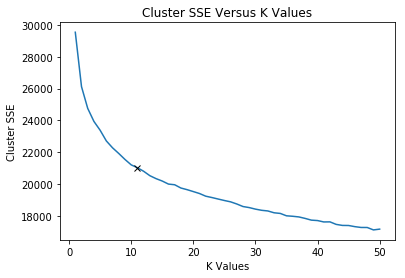

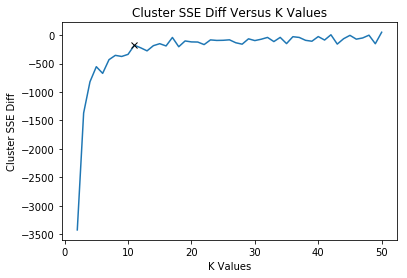

In [144]:
k = np.arange(1, 51, 1)
tol = -200

optimal_k = find_opt_k(data_full_norm_trans, k, tol)

In [145]:
kmeans = KMeans(n_clusters = optimal_k, max_iter = 500, verbose = 0, n_init = 5, init = "k-means++")
kmeans.fit(data_full_norm_trans)
clusters = kmeans.predict(data_full_norm_trans)
centers = kmeans.cluster_centers_


In [146]:
print clusters.shape

(3754L,)


In [147]:
sse_center_dist = calc_cluster_error(centers, clusters, data_full_norm_trans)
print 'Total Clustering Sum Squared Error:'
print sse_center_dist

Total Clustering Sum Squared Error:
21040.9841652


In [148]:
cluster_names = []
uniq_cluster = np.unique(clusters)
for i in uniq_cluster:
    temp_str = 'Cluster_' + str(i)
    cluster_names.append(temp_str)

In [149]:
centroid_df = pd.DataFrame(centers, index = cluster_names)
centroid_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37
Cluster_0,1.060912,0.260707,0.847401,-0.617918,-0.212877,0.091412,0.006488,0.071552,-0.059151,0.094215,-0.014102,-0.099358,-0.065412,0.026045,-0.026751,0.096739,0.000143,0.020642,0.047901,-0.088358,0.083076,0.115329,0.046012,-0.003432,-0.018778,0.013827,-0.000558,0.018930,-0.006954,0.005985,0.009003,-0.022930,0.021912,0.027222,0.006573,0.021583,0.027542,-0.005294
Cluster_1,-0.755064,-1.007839,0.275787,0.625195,-0.239750,-0.290103,0.129256,0.065633,-0.016490,-0.159895,-0.063635,0.059267,-0.060007,0.037725,0.047625,-0.031042,0.011371,0.031245,0.014054,0.010727,-0.004009,-0.021702,0.027806,-0.021831,0.013612,0.006065,0.000470,-0.011174,0.015431,-0.005019,-0.013585,0.016343,-0.014177,-0.008292,-0.012971,-0.000216,0.007753,0.002319
Cluster_2,-0.885694,-0.112268,1.204534,0.089322,-0.062865,-0.011413,0.295830,0.104713,-0.017185,-0.101875,-0.079276,0.109399,0.019956,-0.014804,-0.055144,0.021078,0.029573,-0.033929,0.048270,0.002701,-0.068819,-0.084014,0.019417,-0.043528,0.003031,-0.042456,-0.017399,0.049545,0.019483,0.019533,-0.008492,-0.051399,0.002852,0.008664,-0.005987,-0.034785,-0.014394,-0.005080
Cluster_3,-0.304494,0.311082,-0.856199,0.609855,-0.416746,-0.217179,-0.099483,0.121265,-0.018327,-0.158480,-0.027188,-0.041085,-0.020843,0.013651,0.022003,-0.014780,-0.031916,-0.020933,-0.020261,0.053985,-0.022108,-0.000836,-0.019580,0.025053,0.019616,-0.004276,0.009583,-0.018799,-0.019521,0.021969,-0.000909,0.009354,-0.007960,0.018323,0.001251,0.003872,0.015662,-0.007306
Cluster_4,1.064918,-0.742585,-0.263123,-0.429423,-0.730480,-0.081257,-0.077199,-0.080972,-0.051198,0.160853,-0.007782,0.052234,0.069167,0.047222,-0.006773,0.041109,-0.074141,-0.038588,0.002451,-0.025881,0.046959,0.015597,0.023952,0.032915,0.016879,0.000149,-0.000755,-0.028619,-0.006881,0.010978,-0.013916,-0.003330,0.024600,-0.013817,0.004504,0.002337,0.006254,0.022519
Cluster_5,-0.990877,0.032634,0.175278,-0.689306,0.447530,0.399090,0.073203,-0.114820,0.025719,0.211924,0.031802,0.020650,0.073583,-0.012195,-0.022663,0.014144,0.042844,-0.030969,-0.030181,0.018497,0.014678,0.003753,-0.051040,0.015745,-0.014482,-0.008843,0.006315,0.029934,-0.006077,-0.014403,-0.006727,0.004434,-0.002834,-0.020528,-0.013330,0.003943,-0.012784,0.010461
Cluster_6,1.822474,0.253983,-0.011964,0.108974,0.461855,-0.105484,0.096244,-0.128364,0.126527,0.031267,-0.068420,0.370330,-0.009763,-0.156787,0.378112,-0.443253,0.077059,-0.006196,-0.105039,0.086082,-0.001950,-0.065130,-0.068281,-0.073001,-0.004779,-0.013830,0.010332,-0.002605,0.012103,-0.002274,0.003634,0.038877,-0.059013,-0.008791,-0.017233,-0.017789,-0.011812,-0.017757
Cluster_7,0.001185,1.019018,0.266989,0.451477,0.715736,0.130236,-0.061503,0.087061,-0.023900,-0.103372,0.042979,-0.080568,0.000554,0.021241,-0.058910,0.104154,-0.022619,0.051698,0.003133,0.038744,-0.099567,-0.002394,0.000050,0.016246,0.022898,0.018409,-0.010768,-0.019601,0.003026,0.024301,0.002314,0.014968,0.000368,-0.028737,0.010615,-0.028471,-0.004782,0.025912
Cluster_8,1.582122,-0.343835,-0.317448,0.272187,0.211588,0.006990,0.033093,0.094339,-0.110948,-0.176501,0.063446,-0.307035,-0.026161,0.048621,-0.240604,0.226366,0.037656,-0.037082,0.003064,-0.098879,0.113834,0.024087,0.015742,0.048892,-0.012517,0.005794,0.014686,0.020820,-0.020325,-0.010856,-0.016150,-0.022319,0.013016,-0.016842,-0.010242,0.011486,-0.030573,-0.004195
Cluster_9,-0.619674,-0.729316,-0.667798,0.060857,0.293662,0.103525,-0.159222,-0.077936,0.039087,0.083180,0.060401,-0.056306,-0.043119,-0.001405,0.011528,-0.059258,-0.057794,0.067010,-0.013233,0.010904,-0.020490,-0.003297,0.018419,0.006612,0.007873,0.011370,-0.013279,-0.007138,0.024059,-0.016790,0.028195,0.019142,0.003882,0.019210,0.022788,0.004081,0.013866,-0.005783


In [150]:
centroid_df.to_csv('C:\\DePaul Coursework\\Fall 2017 CSC 478\\Final Project\\Outputs\\NHANES Optimal Clusters PCA Norm.csv')

# Cluster Scoring with PCA Data From Normalized Full Training and K = 2

In [151]:
kmeans = KMeans(n_clusters = optimal_k, max_iter = 500, verbose = 0, n_init = 5, init = "k-means++")
kmeans.fit(data_full_norm_trans)
clusters = kmeans.predict(data_full_norm_trans)
centers = kmeans.cluster_centers_


In [152]:
sse_center_dist = calc_cluster_error(centers, clusters, data_full_norm_trans)
print 'Total Clustering Sum Squared Error:'
print sse_center_dist

Total Clustering Sum Squared Error:
21005.1335878


In [153]:
print 'Clustering Completeness Score:', completeness_score(target_all, clusters)

Clustering Completeness Score: 0.0116507099752


In [154]:
print 'Clustering Homogeneity Score:', homogeneity_score(target_all, clusters)

Clustering Homogeneity Score: 0.186242204545


# ---------------------------------- Linear Regression -------------------------------------------------

# Create Target and Training Dataset For Linear Regression (BMI is the Target)

In [155]:
target_reg_df = nhanes_data['BMI_Perc']
target_reg_df.head()

SEQN
73557    18.459084
73559    19.430069
73562    28.011975
73564    25.270377
73565    19.928276
Name: BMI_Perc, dtype: float64

In [156]:
train_reg_df = nhanes_data[:]
train_reg_df = train_reg_df.drop('BMI_Perc', 1) 


In [157]:
train_reg_df = train_reg_df.drop('Obese_Ind', 1) 
train_reg_df = train_reg_df.drop('Height_m', 1) 
train_reg_df = train_reg_df.drop('Weight_kg', 1) 
#train_reg_df = train_reg_df.drop('WHD010', 1) 
#train_reg_df = train_reg_df.drop('WHD020', 1) 


In [158]:
print train_reg_df.head()

      RIAGENDR  RIDAGEYR            RIDRETH1                DMDEDUC2  \
SEQN                                                                   
73557     Male        69  Non_Hispanic_Black    High_School_Grad_GED   
73559     Male        72  Non_Hispanic_White         Some_College_AA   
73562     Male        56    Mexican_American         Some_College_AA   
73564   Female        61  Non_Hispanic_White  College_Grad_And_Above   
73565     Male        42      Other_Hispanic    High_School_Grad_GED   

        DMDMARTL         INDHHIN2  INDFMPIR BPQ020  CBD070  CBD090  CBD120  \
SEQN                                                                         
73557  Separated   15000_to_19999      0.84    Yes   300.0     0.0     0.0   
73559    Married   65000_to_74999      4.51    Yes   150.0    25.0    40.0   
73562   Divorced   55000_to_64999      4.79    Yes   150.0    60.0    60.0   
73564    Widowed   65000_to_74999      5.00    Yes   400.0   100.0   200.0   
73565    Married  100000_An

In [159]:
train_reg_df_spdsht = pd.get_dummies(train_reg_df)

In [160]:
data_reg_train, data_reg_test, target_reg_train, target_reg_test = train_test_split(train_reg_df_spdsht, target_reg_df, test_size = 0.2, random_state = 45)

In [161]:
min_max_scaler = preprocessing.MinMaxScaler().fit(data_reg_train)
data_train_reg_norm_np = min_max_scaler.transform(data_reg_train)
data_test_reg_norm_np = min_max_scaler.transform(data_reg_test)

In [162]:
data_reg_train_np = np.array(data_reg_train)
data_reg_test_np = np.array(data_reg_test)
target_reg_train_np = np.array(target_reg_train)
target_reg_test_np = np.array(target_reg_test)

print data_reg_train_np.shape
print target_reg_train_np.shape
print data_reg_test_np.shape
print target_reg_test_np.shape


(3003L, 103L)
(3003L,)
(751L, 103L)
(751L,)


# Create functions Needed For Linear Regression

In [163]:
def find_reg_percent(x_arr, y_arr, model, percent_list, cv_num):

    print '---------------------------------- Feature Selection ----------------------------------'
        
    results = []
    feature_select = []
    feature_scores = []
    features_pvals = []
    for i in percent_list:
        fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile = i)
        x_arr_fs = fs.fit_transform(x_arr, y_arr)
        
        # Note that when I tried to use mean_absolute_error as the scoring I received a warning that this was 
        # replaced with neg_mean_absolute_error.  I replaced the scoring type to neg_mean_absolute_error then.
        scores = cross_validation.cross_val_score(model, x_arr_fs, y_arr, cv = cv_num, scoring = "neg_mean_squared_error")
        scores = np.absolute(scores)
        score_rmse = np.sqrt(scores.mean())
        results = np.append(results, score_rmse)        
        feature_select.append(fs.get_support())
        feature_scores.append(fs.scores_)
        features_pvals.append(fs.pvalues_)

    
    optimal_ndx = np.where(results == results.min())[0]
    if len(optimal_ndx) > 1:
        optimal_ndx = optimal_ndx[-1]
    optimal_percentile = int(percent_list[optimal_ndx])
    optimal_num_features = int(optimal_percentile*(x_arr.shape[1])/100) 
    
    chosen_features = feature_select[int(optimal_ndx)]
    chosen_weights = feature_scores[int(optimal_ndx)]
    chosen_pvals = features_pvals[int(optimal_ndx)]
    
    pl.figure()
    pl.xlabel("Percentage of features selected")
    pl.ylabel("Cross Validation Root Mean Squared Error")
    pl.plot(percent_list, results)
    plt.plot(optimal_percentile, results[optimal_ndx], 'x', c='k')
    plt.show()   
    
    return optimal_percentile, optimal_num_features, chosen_features, chosen_weights, chosen_pvals


In [164]:
def optimize_reg_features(train_arr, target_arr, model, all_attrs, chosen_features, chosen_weights, chosen_pvals, cv_num):
    
    print 'Feature Optimization (Removal of All Attributes with P Values >= 0.05)'
    print '----------------------------------------------------------------------'
    
    train_all_df = pd.DataFrame(train_arr, columns = all_attrs)
                      
    all_w_arr = np.zeros((1, len(chosen_weights)))
    all_w_arr[0] = chosen_weights
    all_w_df = pd.DataFrame(all_w_arr, columns = all_attrs)

    all_p_arr = np.zeros((1, len(chosen_pvals)))
    all_p_arr[0] = chosen_pvals
    all_p_df = pd.DataFrame(all_p_arr, columns = all_attrs)

    fs_features = all_attrs[chosen_features]
    train_fs_df = train_all_df[fs_features]
                      
    fs_weights = chosen_weights[chosen_features]
    fs_p_vals = chosen_pvals[chosen_features]
                      
    fs_w_arr = np.zeros((1, len(fs_weights)))
    fs_w_arr[0] = fs_weights
    fs_w_df = pd.DataFrame(fs_w_arr, columns = fs_features)

    fs_p_arr = np.zeros((1, len(fs_p_vals)))
    fs_p_arr[0] = fs_p_vals
    fs_p_df = pd.DataFrame(fs_p_arr, columns = fs_features)

    result = 0
    feature_select = []
    feature_scores = []
    features_pvals = []

    fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile = 100)

    while True:
        
        p_vals = np.array(fs_p_df)
        max_ndx = np.where(p_vals == p_vals.max())
        max_ndx = np.where(p_vals == p_vals.max())[1]
        if len(max_ndx) > 1:
            max_ndx = max_ndx[0]
        max_p = p_vals[0, int(max_ndx)]
        
        if max_p < 0.05:
            new_fs_features = train_fs_df.columns.values.tolist()
            break
                      
        # Remove attribute with max p value over 0.05
        col_names = train_fs_df.columns.values.tolist()
        max_attr = col_names[int(max_ndx)]
                      
        train_fs_df = train_fs_df.drop(max_attr, 1)
        
        train_fs_np = np.array(train_fs_df)
        new_fs_features = train_fs_df.columns.values.tolist()

        train_arr_fs = fs.fit_transform(train_fs_np, target_arr)
        
        scores = cross_validation.cross_val_score(model, train_arr_fs, target_arr, cv = cv_num, scoring = "neg_mean_squared_error")
        scores = np.absolute(scores)
        result = np.sqrt(scores.mean())        
        feature_select = fs.get_support()
        feature_scores = fs.scores_
        features_pvals = fs.pvalues_
                              
        fs_w_arr = np.zeros((1, len(feature_scores)))
        fs_w_arr[0] = feature_scores
        fs_w_df = pd.DataFrame(fs_w_arr, columns = new_fs_features)

        fs_p_arr = np.zeros((1, len(features_pvals)))
        fs_p_arr[0] = features_pvals
        fs_p_df = pd.DataFrame(fs_p_arr, columns = new_fs_features)
                     

    all_info_df = pd.DataFrame(all_attrs)
    all_info_df["weights"] = chosen_weights
    all_info_df["p_values"] = chosen_pvals
                                          
    fs_info_df = pd.DataFrame(new_fs_features)
    fs_info_df["weights"] = np.array(fs_w_df)[0]
    fs_info_df["p_values"] = np.array(fs_p_df)[0]
                                                              

    print 'Final Number of Training Set Attributes:', train_fs_df.shape[1]
    print 'Final Training Set Features Selection Root Mean Squared Error:', result
    print 'Final Training Set Attributes:'
    print new_fs_features
    print '\n'
                      
    return train_fs_df, all_info_df, fs_info_df


In [165]:
def perform_reg_grid_search(model, data_train, target_train, data_test, target_test, param_dict, cv_num):

    print '---------------------------------- Parameter Grid Search ----------------------------------'
        
    num_params = len(param_dict.keys())
    gs = GridSearchCV(model, param_dict, verbose=1, cv=cv_num)
    %time _ = gs.fit(data_train, target_train)
    opt_params = gs.best_params_
    opt_score = gs.best_score_
    print '\n'
    print 'Grid Search Optimal Parameters:', opt_params 
    print 'Grid Search Optimal Parameter Score:', opt_score
    print '\n'
    
    # Set the optimal grid search parameters
    for key, value in opt_params.items():
        model.set_params(**{key: value})
    print 'Final Model Parameter Settings:'
    print(model)
    print '\n'
    
    return model

In [166]:
def model_reg_data(model, data_train, target_train, data_test, target_test, cv_num):

    # Get the performance of the training and testing data sets
    print '---------------------------------- Training Data Performance ----------------------------------'
    print '\n'
    print 'Final Model Training Set Cross Validation Results'
    print '-------------------------------------------------'
    
    model_reg_cv_data(model, data_train, target_train, cv_num)
    print '\n'
    
    # Fit the training data to the optimal model, using the features from feature selection
    model.fit(data_train, target_train)
    
    print 'Final Model Full Training Set Results'
    print '-------------------------------------'
    train_pred = model.predict(data_train)
    train_rmse = np.sqrt(metrics.mean_squared_error(target_train, train_pred))
    train_r2 = metrics.r2_score(target_train, train_pred)
    print "Root Mean Squared Error:"
    print train_rmse, "\n"
    print "R-Squared:"
    print train_r2, "\n"
    
    # Return the model coefficients
    model_coefs = model.coef_
    
    print '\n'
    print '---------------------------------- Testing Data Performance ----------------------------------'   
    print '\n'
    print 'Final Model Testing Set Results'
    print '-------------------------------'
   
    test_pred = model.predict(data_test)
    test_rmse = metrics.mean_squared_error(target_test, test_pred)
    test_r2 = metrics.r2_score(target_test, test_pred)
    print "Root Mean Squared Error:"
    print test_rmse, "\n"
    print "R-Squared:"
    print test_r2, "\n"

        
    return model, model_coefs


In [167]:
def model_reg_cv_data(model, data_train, target_train, cv_num):

    kf = KFold(len(data_train), n_folds = cv_num, shuffle=True, random_state=0)
    cross_rmse_train = 0
    cross_rmse_test = 0
    cross_r2_train = 0
    cross_r2_test = 0
    for trainNdx, testNdx in kf:
        model.fit(data_train[trainNdx,:], target_train[trainNdx])
        train_pred = model.predict(data_train[trainNdx,:])
        cross_rmse_train += metrics.mean_squared_error(target_train[trainNdx], train_pred)
        cross_r2_train += metrics.r2_score(target_train[trainNdx], train_pred)

        test_pred = model.predict(data_train[testNdx,:])
        cross_rmse_test += metrics.mean_squared_error(target_train[testNdx], test_pred)
        cross_r2_test += metrics.r2_score(target_train[testNdx], test_pred)

    rmse_cv_train = cross_rmse_train/cv_num
    rmse_cv_test = cross_rmse_test/cv_num
    r2_cv_train = cross_r2_train/cv_num
    r2_cv_test = cross_r2_test/cv_num

    print cv_num, 'Fold Cross Validation Training Average Root Mean Squared Error:'
    print rmse_cv_train
    print cv_num, 'Fold Cross Validation Training Average R-Squared:'
    print r2_cv_train
    print '\n'
    print cv_num, 'Fold Cross Validation Testing Average Root Mean Squared Error:'
    print rmse_cv_test
    print cv_num, 'Fold Cross Validation Testing Average R-Squared:'
    print r2_cv_test
    

In [168]:
def create_opt_reg_model(model, data_train, target_train, data_test, target_test, percent_list, param_dict, cv_num, attrs):
    
    # Find the optimal list of features to use
    opt_percent, opt_num, chosen_attr, chosen_w, chosen_p = find_reg_percent(data_train, target_train, model, percent_list, cv_num)
    print 'Optimal Percent:', opt_percent
    print 'Optimal Number of Features:', opt_num
    print 'Features Chosen:'
    print attrs[chosen_attr]
    print '\n'
    
    train_fs_df, all_info_df, fs_info_df = optimize_reg_features(data_train, target_train, model, attrs, chosen_attr, chosen_w, chosen_p, cv_num)
    
    # Get the training and testing data with chosen features
    selected_features = train_fs_df.columns.values.tolist()
    train_arr_fs = np.array(train_fs_df)  
    
    test_df = pd.DataFrame(data_test, columns = attrs)
    test_fs_df = test_df[selected_features]                                                       
    test_arr_fs = np.array(test_fs_df)
    
    # Perform grid search with parameter dictionary passed in
    opt_model = perform_reg_grid_search(model, train_arr_fs, target_train, test_arr_fs, target_test, param_dict, cv_num)
    
    # Perform grid search with parameter dictionary passed in
    final_model, model_coefs = model_reg_data(opt_model, train_arr_fs, target_train, test_arr_fs, target_test, cv_num)
    
    fs_info_df["coeffs"] = model_coefs
    
    return final_model, all_info_df, fs_info_df, selected_features
    

# Create array of feature names used for linear regression modelling

In [169]:
reg_spdsht_features = np.array(data_reg_train.columns.values.tolist())
print reg_spdsht_features.shape

reg_spdsht_features_df = pd.DataFrame(reg_spdsht_features)
reg_spdsht_features_df.to_csv('C:\\DePaul Coursework\\Fall 2017 CSC 478\\Final Project\\Outputs\\Reg Dataset Training Features.csv')

(103L,)


# Linear Regression On Original Training

Percentage List Used:
[ 10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27
  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45
  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63
  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81
  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99
 100]


---------------------------------- Feature Selection ----------------------------------


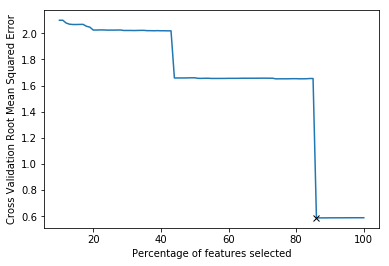

Optimal Percent: 86
Optimal Number of Features: 88
Features Chosen:
['RIDAGEYR' 'INDFMPIR' 'CBD070' 'CBD120' 'CBD130' 'DBD895' 'DBD900'
 'PAD680' 'WHD010' 'WHD020' 'RIAGENDR_Female' 'RIAGENDR_Male'
 'RIDRETH1_Mexican_American' 'RIDRETH1_Non_Hispanic_Black'
 'RIDRETH1_Non_Hispanic_White' 'RIDRETH1_Other' 'RIDRETH1_Other_Hispanic'
 'DMDEDUC2_9th_to_12th_No_Grad' 'DMDEDUC2_College_Grad_And_Above'
 'DMDEDUC2_High_School_Grad_GED' 'DMDEDUC2_Less_Than_9th'
 'DMDEDUC2_Some_College_AA' 'DMDMARTL_Divorced' 'DMDMARTL_Living_W_Partner'
 'DMDMARTL_Married' 'DMDMARTL_Never_Married' 'DMDMARTL_Widowed'
 'INDHHIN2_0_to_4999' 'INDHHIN2_100000_And_Over' 'INDHHIN2_15000_to_19999'
 'INDHHIN2_25000_to_34999' 'INDHHIN2_35000_to_44999'
 'INDHHIN2_5000_to_9999' 'INDHHIN2_55000_to_64999'
 'INDHHIN2_65000_to_74999' 'INDHHIN2_75000_to_99999' 'BPQ020_No'
 'BPQ020_Yes' 'DIQ010_Borderline' 'DIQ010_No' 'DIQ010_Yes' 'MCQ080_No'
 'MCQ080_Yes' 'MCQ365A_No' 'MCQ365A_Yes' 'MCQ365B_No' 'MCQ365B_Yes'
 'SMQ020_No' 'SMQ020_Y

In [170]:
cv = 10
lin_reg = LinearRegression(fit_intercept=True)
percentages = a = np.arange(10, 101, 1)

print 'Percentage List Used:'
print percentages
print '\n'

# Find the optimal list of features to use
opt_percent, opt_num, chosen_attr, chosen_w, chosen_p = find_reg_percent(data_reg_train_np, target_reg_train_np, lin_reg, percentages, cv)
print 'Optimal Percent:', opt_percent
print 'Optimal Number of Features:', opt_num
print 'Features Chosen:'
print reg_spdsht_features[chosen_attr]
print '\n'

train_fs_df, lin_all_info_df, lin_fs_info_df = optimize_reg_features(data_reg_train_np, target_reg_train_np, lin_reg, reg_spdsht_features, chosen_attr, chosen_w, chosen_p, cv)

# Get the training and testing data with chosen features
selected_features = train_fs_df.columns.values.tolist()
train_arr_fs = np.array(train_fs_df)  

test_df = pd.DataFrame(data_reg_test_np, columns = reg_spdsht_features)
test_fs_df = test_df[selected_features]                                                       
test_arr_fs = np.array(test_fs_df)

# Perform grid search with parameter dictionary passed in
lin_model, lin_model_coefs = model_reg_data(lin_reg, train_arr_fs, target_reg_train_np, test_arr_fs, target_reg_test_np, cv)

lin_fs_info_df["coeffs"] = lin_model_coefs


In [171]:
lin_fs_info_df.to_csv('C:\\DePaul Coursework\\Fall 2017 CSC 478\\Final Project\\Outputs\\LinReg Feature Info.csv')

# Linear Regression On Normalized Training

Percentage List Used:
[ 10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27
  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45
  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63
  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81
  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99
 100]


---------------------------------- Feature Selection ----------------------------------


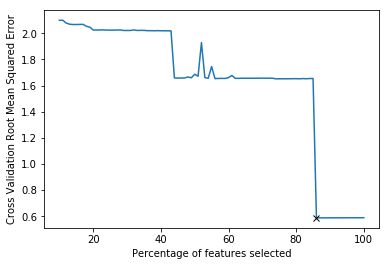

Optimal Percent: 86
Optimal Number of Features: 88
Features Chosen:
['RIDAGEYR' 'INDFMPIR' 'CBD070' 'CBD120' 'CBD130' 'DBD895' 'DBD900'
 'PAD680' 'WHD010' 'WHD020' 'RIAGENDR_Female' 'RIAGENDR_Male'
 'RIDRETH1_Mexican_American' 'RIDRETH1_Non_Hispanic_Black'
 'RIDRETH1_Non_Hispanic_White' 'RIDRETH1_Other' 'RIDRETH1_Other_Hispanic'
 'DMDEDUC2_9th_to_12th_No_Grad' 'DMDEDUC2_College_Grad_And_Above'
 'DMDEDUC2_High_School_Grad_GED' 'DMDEDUC2_Less_Than_9th'
 'DMDEDUC2_Some_College_AA' 'DMDMARTL_Divorced' 'DMDMARTL_Living_W_Partner'
 'DMDMARTL_Married' 'DMDMARTL_Never_Married' 'DMDMARTL_Widowed'
 'INDHHIN2_0_to_4999' 'INDHHIN2_100000_And_Over' 'INDHHIN2_15000_to_19999'
 'INDHHIN2_25000_to_34999' 'INDHHIN2_35000_to_44999'
 'INDHHIN2_5000_to_9999' 'INDHHIN2_55000_to_64999'
 'INDHHIN2_65000_to_74999' 'INDHHIN2_75000_to_99999' 'BPQ020_No'
 'BPQ020_Yes' 'DIQ010_Borderline' 'DIQ010_No' 'DIQ010_Yes' 'MCQ080_No'
 'MCQ080_Yes' 'MCQ365A_No' 'MCQ365A_Yes' 'MCQ365B_No' 'MCQ365B_Yes'
 'SMQ020_No' 'SMQ020_Y

In [172]:
cv = 10
lin_reg = LinearRegression(fit_intercept=True)
percentages = a = np.arange(10, 101, 1)

print 'Percentage List Used:'
print percentages
print '\n'

# Find the optimal list of features to use
opt_percent, opt_num, chosen_attr, chosen_w, chosen_p = find_reg_percent(data_train_reg_norm_np, target_reg_train_np, lin_reg, percentages, cv)
print 'Optimal Percent:', opt_percent
print 'Optimal Number of Features:', opt_num
print 'Features Chosen:'
print reg_spdsht_features[chosen_attr]
print '\n'

train_fs_df, lin_norm_all_info_df, lin_norm_fs_info_df = optimize_reg_features(data_train_reg_norm_np, target_reg_train_np, lin_reg, reg_spdsht_features, chosen_attr, chosen_w, chosen_p, cv)

# Get the training and testing data with chosen features
selected_features = train_fs_df.columns.values.tolist()
train_arr_fs = np.array(train_fs_df)  

test_df = pd.DataFrame(data_test_reg_norm_np, columns = reg_spdsht_features)
test_fs_df = test_df[selected_features]                                                       
test_arr_fs = np.array(test_fs_df)

# Perform grid search with parameter dictionary passed in
lin_model, lin_norm_model_coefs = model_reg_data(lin_reg, train_arr_fs, target_reg_train_np, test_arr_fs, target_reg_test_np, cv)

lin_norm_fs_info_df["coeffs"] = lin_norm_model_coefs


In [173]:
lin_norm_fs_info_df.to_csv('C:\\DePaul Coursework\\Fall 2017 CSC 478\\Final Project\\Outputs\\LinReg Norm Feature Info.csv')

# Ridge Regression On Original Training

Percentage List Used:
[ 10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27
  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45
  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63
  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81
  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99
 100]


---------------------------------- Feature Selection ----------------------------------


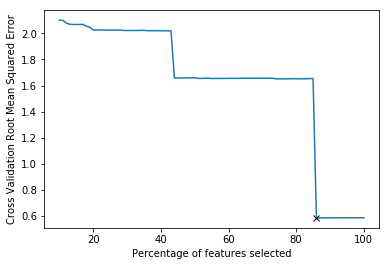

Optimal Percent: 86
Optimal Number of Features: 88
Features Chosen:
['RIDAGEYR' 'INDFMPIR' 'CBD070' 'CBD120' 'CBD130' 'DBD895' 'DBD900'
 'PAD680' 'WHD010' 'WHD020' 'RIAGENDR_Female' 'RIAGENDR_Male'
 'RIDRETH1_Mexican_American' 'RIDRETH1_Non_Hispanic_Black'
 'RIDRETH1_Non_Hispanic_White' 'RIDRETH1_Other' 'RIDRETH1_Other_Hispanic'
 'DMDEDUC2_9th_to_12th_No_Grad' 'DMDEDUC2_College_Grad_And_Above'
 'DMDEDUC2_High_School_Grad_GED' 'DMDEDUC2_Less_Than_9th'
 'DMDEDUC2_Some_College_AA' 'DMDMARTL_Divorced' 'DMDMARTL_Living_W_Partner'
 'DMDMARTL_Married' 'DMDMARTL_Never_Married' 'DMDMARTL_Widowed'
 'INDHHIN2_0_to_4999' 'INDHHIN2_100000_And_Over' 'INDHHIN2_15000_to_19999'
 'INDHHIN2_25000_to_34999' 'INDHHIN2_35000_to_44999'
 'INDHHIN2_5000_to_9999' 'INDHHIN2_55000_to_64999'
 'INDHHIN2_65000_to_74999' 'INDHHIN2_75000_to_99999' 'BPQ020_No'
 'BPQ020_Yes' 'DIQ010_Borderline' 'DIQ010_No' 'DIQ010_Yes' 'MCQ080_No'
 'MCQ080_Yes' 'MCQ365A_No' 'MCQ365A_Yes' 'MCQ365B_No' 'MCQ365B_Yes'
 'SMQ020_No' 'SMQ020_Y

[Parallel(n_jobs=1)]: Done 10000 out of 10000 | elapsed:   53.1s finished


In [174]:
cv = 10
ridge_reg = Ridge(fit_intercept=True)
percentages = a = np.arange(10, 101, 1)

values = np.arange(0.001, 5, 0.005)

parameters = {
    'alpha': values
}

print 'Percentage List Used:'
print percentages
print '\n'

rid_model, rid_all_info_df, rid_fs_info_df, rid_features = create_opt_reg_model(ridge_reg, data_reg_train_np, target_reg_train_np, data_reg_test_np, target_reg_test_np, percentages, parameters, cv, reg_spdsht_features)


In [175]:
rid_fs_info_df.to_csv('C:\\DePaul Coursework\\Fall 2017 CSC 478\\Final Project\\Outputs\\Ridge Feature Info.csv')

# Ridge Regression On Normalized Training

Percentage List Used:
[ 10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27
  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45
  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63
  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81
  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99
 100]


---------------------------------- Feature Selection ----------------------------------


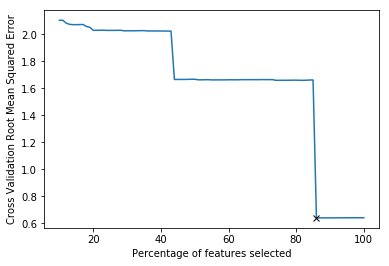

Optimal Percent: 86
Optimal Number of Features: 88
Features Chosen:
['RIDAGEYR' 'INDFMPIR' 'CBD070' 'CBD120' 'CBD130' 'DBD895' 'DBD900'
 'PAD680' 'WHD010' 'WHD020' 'RIAGENDR_Female' 'RIAGENDR_Male'
 'RIDRETH1_Mexican_American' 'RIDRETH1_Non_Hispanic_Black'
 'RIDRETH1_Non_Hispanic_White' 'RIDRETH1_Other' 'RIDRETH1_Other_Hispanic'
 'DMDEDUC2_9th_to_12th_No_Grad' 'DMDEDUC2_College_Grad_And_Above'
 'DMDEDUC2_High_School_Grad_GED' 'DMDEDUC2_Less_Than_9th'
 'DMDEDUC2_Some_College_AA' 'DMDMARTL_Divorced' 'DMDMARTL_Living_W_Partner'
 'DMDMARTL_Married' 'DMDMARTL_Never_Married' 'DMDMARTL_Widowed'
 'INDHHIN2_0_to_4999' 'INDHHIN2_100000_And_Over' 'INDHHIN2_15000_to_19999'
 'INDHHIN2_25000_to_34999' 'INDHHIN2_35000_to_44999'
 'INDHHIN2_5000_to_9999' 'INDHHIN2_55000_to_64999'
 'INDHHIN2_65000_to_74999' 'INDHHIN2_75000_to_99999' 'BPQ020_No'
 'BPQ020_Yes' 'DIQ010_Borderline' 'DIQ010_No' 'DIQ010_Yes' 'MCQ080_No'
 'MCQ080_Yes' 'MCQ365A_No' 'MCQ365A_Yes' 'MCQ365B_No' 'MCQ365B_Yes'
 'SMQ020_No' 'SMQ020_Y

[Parallel(n_jobs=1)]: Done 10000 out of 10000 | elapsed:   51.9s finished


In [176]:
cv = 10
ridge_reg = Ridge(fit_intercept=True)
percentages = a = np.arange(10, 101, 1)

values = np.arange(0.001, 5, 0.005)

parameters = {
    'alpha': values
}

print 'Percentage List Used:'
print percentages
print '\n'

rid_model, rid_norm_all_info_df, rid_norm_fs_info_df, rid_features = create_opt_reg_model(ridge_reg, data_train_reg_norm_np, target_reg_train_np, data_test_reg_norm_np, target_reg_test_np, percentages, parameters, cv, reg_spdsht_features)


In [177]:
rid_norm_fs_info_df.to_csv('C:\\DePaul Coursework\\Fall 2017 CSC 478\\Final Project\\Outputs\\Ridge Norm Feature Info.csv')

# Lasso Regression On Original Training

Percentage List Used:
[ 10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27
  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45
  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63
  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81
  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99
 100]


---------------------------------- Feature Selection ----------------------------------


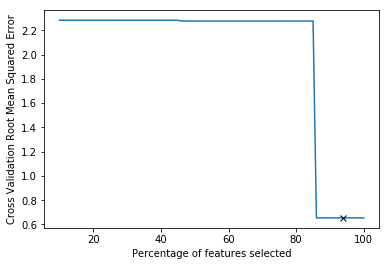

Optimal Percent: 94
Optimal Number of Features: 96
Features Chosen:
['RIDAGEYR' 'INDFMPIR' 'CBD070' 'CBD120' 'CBD130' 'DBD895' 'DBD900'
 'DBD910' 'PAD680' 'WHD010' 'WHD020' 'RIAGENDR_Female' 'RIAGENDR_Male'
 'RIDRETH1_Mexican_American' 'RIDRETH1_Non_Hispanic_Black'
 'RIDRETH1_Non_Hispanic_White' 'RIDRETH1_Other' 'RIDRETH1_Other_Hispanic'
 'DMDEDUC2_9th_to_12th_No_Grad' 'DMDEDUC2_College_Grad_And_Above'
 'DMDEDUC2_High_School_Grad_GED' 'DMDEDUC2_Less_Than_9th'
 'DMDEDUC2_Some_College_AA' 'DMDMARTL_Divorced' 'DMDMARTL_Living_W_Partner'
 'DMDMARTL_Married' 'DMDMARTL_Never_Married' 'DMDMARTL_Widowed'
 'INDHHIN2_0_to_4999' 'INDHHIN2_100000_And_Over' 'INDHHIN2_10000_to_14999'
 'INDHHIN2_15000_to_19999' 'INDHHIN2_20000_to_24999'
 'INDHHIN2_25000_to_34999' 'INDHHIN2_35000_to_44999'
 'INDHHIN2_5000_to_9999' 'INDHHIN2_55000_to_64999'
 'INDHHIN2_65000_to_74999' 'INDHHIN2_75000_to_99999' 'BPQ020_No'
 'BPQ020_Yes' 'DIQ010_Borderline' 'DIQ010_No' 'DIQ010_Yes' 'MCQ080_No'
 'MCQ080_Yes' 'MCQ365A_No' '

[Parallel(n_jobs=1)]: Done 10000 out of 10000 | elapsed:   54.5s finished


In [178]:
cv = 10
lasso_reg = Lasso(fit_intercept=True)
percentages = a = np.arange(10, 101, 1)

values = np.arange(0.001, 5, 0.005)

parameters = {
    'alpha': values
}

print 'Percentage List Used:'
print percentages
print '\n'

las_model, las_all_info_df, las_fs_info_df, las_features = create_opt_reg_model(lasso_reg, data_reg_train_np, target_reg_train_np, data_reg_test_np, target_reg_test_np, percentages, parameters, cv, reg_spdsht_features)


In [179]:
las_fs_info_df.to_csv('C:\\DePaul Coursework\\Fall 2017 CSC 478\\Final Project\\Outputs\\Lasso Feature Info.csv')

# Lasso Regression On Normalized Training

Percentage List Used:
[ 10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27
  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45
  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63
  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81
  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99
 100]


---------------------------------- Feature Selection ----------------------------------


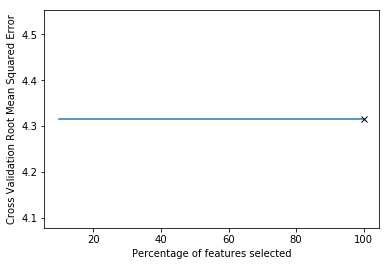

Optimal Percent: 100
Optimal Number of Features: 103
Features Chosen:
['RIDAGEYR' 'INDFMPIR' 'CBD070' 'CBD090' 'CBD120' 'CBD130' 'DBD895'
 'DBD900' 'DBD905' 'DBD910' 'PAD680' 'WHD010' 'WHD020' 'RIAGENDR_Female'
 'RIAGENDR_Male' 'RIDRETH1_Mexican_American' 'RIDRETH1_Non_Hispanic_Black'
 'RIDRETH1_Non_Hispanic_White' 'RIDRETH1_Other' 'RIDRETH1_Other_Hispanic'
 'DMDEDUC2_9th_to_12th_No_Grad' 'DMDEDUC2_College_Grad_And_Above'
 'DMDEDUC2_High_School_Grad_GED' 'DMDEDUC2_Less_Than_9th'
 'DMDEDUC2_Some_College_AA' 'DMDMARTL_Divorced' 'DMDMARTL_Living_W_Partner'
 'DMDMARTL_Married' 'DMDMARTL_Never_Married' 'DMDMARTL_Separated'
 'DMDMARTL_Widowed' 'INDHHIN2_0_to_4999' 'INDHHIN2_100000_And_Over'
 'INDHHIN2_10000_to_14999' 'INDHHIN2_15000_to_19999'
 'INDHHIN2_20000_to_24999' 'INDHHIN2_25000_to_34999'
 'INDHHIN2_35000_to_44999' 'INDHHIN2_45000_to_54999'
 'INDHHIN2_5000_to_9999' 'INDHHIN2_55000_to_64999'
 'INDHHIN2_65000_to_74999' 'INDHHIN2_75000_to_99999' 'BPQ020_No'
 'BPQ020_Yes' 'DIQ010_Borderlin

[Parallel(n_jobs=1)]: Done 10000 out of 10000 | elapsed:   53.1s finished


In [180]:
cv = 10
lasso_reg = Lasso(fit_intercept=True)
percentages = a = np.arange(10, 101, 1)

values = np.arange(0.001, 5, 0.005)

parameters = {
    'alpha': values
}

print 'Percentage List Used:'
print percentages
print '\n'

las_model, las_norm_all_info_df, las_norm_fs_info_df, las_features = create_opt_reg_model(lasso_reg, data_train_reg_norm_np, target_reg_train_np, data_test_reg_norm_np, target_reg_test_np, percentages, parameters, cv, reg_spdsht_features)


In [181]:
las_norm_fs_info_df.to_csv('C:\\DePaul Coursework\\Fall 2017 CSC 478\\Final Project\\Outputs\\Lasso Norm Feature Info.csv')